In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000

In [51]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import data

In [52]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

df = pd.read_csv(url)

## Data Description and Wrangling

In [53]:
print('The shape of our dataset is {}.'.format(df.shape))
print('Displaying the first 5 entries')
df.head()

The shape of our dataset is (202760, 56).
Displaying the first 5 entries


CountryName CountryCode  RegionName  RegionCode Jurisdiction      Date  \
0       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200101   
1       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200102   
2       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200103   
3       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200104   
4       Aruba         ABW         NaN         NaN    NAT_TOTAL  20200105   

   C1M_School closing  C1M_Flag  C2M_Workplace closing  C2M_Flag  \
0                 0.0       NaN                    0.0       NaN   
1                 0.0       NaN                    0.0       NaN   
2                 0.0       NaN                    0.0       NaN   
3                 0.0       NaN                    0.0       NaN   
4                 0.0       NaN                    0.0       NaN   

   C3M_Cancel public events  C3M_Flag  C4M_Restrictions on gatherings  \
0                       0.0       NaN                             0.0   
1                       0.0       NaN                             0.0   
2                       0.0       NaN                             0.0   
3                       0.0       NaN                             0.0   
4                       0.0       NaN                             0.0   

   C4M_Flag  C5M_Close public transport  C5M_Flag  \
0       NaN                         0.0       NaN   
1       NaN                         0.0       NaN   
2       NaN                         0.0       NaN   
3       NaN                         0.0       NaN   
4       NaN                         0.0       NaN   

   C6M_Stay at home requirements  C6M_Flag  \
0                            0.0       NaN   
1                            0.0       NaN   
2                            0.0       NaN   
3                            0.0       NaN   
4                            0.0       NaN   

   C7M_Restrictions on internal movement  C7M_Flag  \
0                                    0.0       NaN   
1                                    0.0       NaN   
2                                    0.0       NaN   
3                                    0.0       NaN   
4                                    0.0       NaN   

   C8EV_International travel controls  E1_Income support  E1_Flag  \
0                                 0.0                0.0      NaN   
1                                 0.0                0.0      NaN   
2                                 0.0                0.0      NaN   
3                                 0.0                0.0      NaN   
4                                 0.0                0.0      NaN   

   E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
0                      0.0                 0.0                       0.0   
1                      0.0                 0.0                       0.0   
2                      0.0                 0.0                       0.0   
3                      0.0                 0.0                       0.0   
4                      0.0                 0.0                       0.0   

   H1_Public information campaigns  H1_Flag  H2_Testing policy  \
0                              0.0      NaN                0.0   
1                              0.0      NaN                0.0   
2                              0.0      NaN                0.0   
3                              0.0      NaN                0.0   
4                              0.0      NaN                0.0   

   H3_Contact tracing  H4_Emergency investment in healthcare  \
0                 0.0                                    0.0   
1                 0.0                                    0.0   
2                 0.0                                    0.0   
3                 0.0                                    0.0   
4                 0.0                                    0.0   

   H5_Investment in vaccines  H6M_Facial Coverings  H6M_Flag  \
0                        0.0                   0.0       N

#### View the output of df.head() in a tabular format.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 



*   Columns 'RegionName' and 'RegionCode' will be dropped since they contain 0 non-null entries.
*  Column 'CountryCode' is dropped to avoid redundancy.



In [55]:
df = df.drop(columns=['RegionName','RegionCode','CountryName'])
print(df.shape)

(202760, 53)


#### Converting 'Date' to datetime.

In [56]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [57]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print("Start Date: {}, End Date: {}".format(start_date,end_date))

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [58]:
# Select columns by data type, excluding datetime columns
non_datetime_columns = df.select_dtypes(exclude=['datetime64[ns]']).columns

# Applying value_counts to display the unique_values and their frequency.
values_of_each_column = {col: df[col].value_counts(dropna=False) for col in non_datetime_columns}

values_of_each_column

{'CountryCode': CountryCode
 ABW    1096
 PAK    1096
 NAM    1096
 NER    1096
 NGA    1096
        ... 
 GMB    1096
 GRC    1096
 GRL    1096
 GTM    1096
 ZWE    1096
 Name: count, Length: 185, dtype: int64,
 'Jurisdiction': Jurisdiction
 NAT_TOTAL    202760
 Name: count, dtype: int64,
 'C1M_School closing': C1M_School closing
 0.0    74497
 1.0    55839
 3.0    41246
 2.0    31178
 Name: count, dtype: int64,
 'C1M_Flag': C1M_Flag
 1.0    107134
 NaN     74497
 0.0     21129
 Name: count, dtype: int64,
 'C2M_Workplace closing': C2M_Workplace closing
 0.0    68936
 2.0    64722
 1.0    51824
 3.0    17278
 Name: count, dtype: int64,
 'C2M_Flag': C2M_Flag
 1.0    106742
 NaN     68936
 0.0     27082
 Name: count, dtype: int64,
 'C3M_Cancel public events': C3M_Cancel public events
 2.0    85119
 0.0    64184
 1.0    53457
 Name: count, dtype: int64,
 'C3M_Flag': C3M_Flag
 1.0    119017
 NaN     64184
 0.0     19559
 Name: count, dtype: int64,
 'C4M_Restrictions on gatherings': C4M_Res


*   We've 1096 entries for each country, having a total of 185 countries represented in this dataset.
*   Dropping 'Jurisdiction' since it has only one unique value.



In [59]:
df = df.drop(columns=['Jurisdiction'])
print(df.shape)

(202760, 52)


#### Converting object dtypes to categorical

Useful for plotting V2B, V2C and Majority Vaccinated.

In [60]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [61]:
df.dtypes

CountryCode                                                                              category
Date                                                                               datetime64[ns]
C1M_School closing                                                                        float64
C1M_Flag                                                                                  float64
C2M_Workplace closing                                                                     float64
C2M_Flag                                                                                  float64
C3M_Cancel public events                                                                  float64
C3M_Flag                                                                                  float64
C4M_Restrictions on gatherings                                                            float64
C4M_Flag                                                                                  float64
C5M_Close public tra

### Dealing With Missing Values

In [62]:
df.isna().sum()

CountryCode                                                                             0
Date                                                                                    0
C1M_School closing                                                                      0
C1M_Flag                                                                            74497
C2M_Workplace closing                                                                   0
C2M_Flag                                                                            68936
C3M_Cancel public events                                                                0
C3M_Flag                                                                            64184
C4M_Restrictions on gatherings                                                          0
C4M_Flag                                                                            76960
C5M_Close public transport                                                              0
C5M_Flag  

#### Drop entries where 'ConfirmedCases' and 'ConfirmedDeaths' are NaNs

In [63]:
df = df.dropna(subset=['ConfirmedCases', 'ConfirmedDeaths'])
print(df.shape)

(201664, 52)


#### Drop 'MajorityVaccinated' and 'PopulationVaccinated'.

In [64]:
df = df.drop(columns=['MajorityVaccinated', 'PopulationVaccinated'])
print(df.shape)

(201664, 50)


#### Removing duplicates

In [65]:
df = df.drop_duplicates()

#### Reset the index of our dataframe

In [66]:
df = df.reset_index(drop=True)

In [67]:
print(df.shape)


(201664, 50)


#### We didn't have any duplicate entries in the dataset.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201664 entries, 0 to 201663
Data columns (total 50 columns):
 #   Column                                                                           Non-Null Count   Dtype         
---  ------                                                                           --------------   -----         
 0   CountryCode                                                                      201664 non-null  category      
 1   Date                                                                             201664 non-null  datetime64[ns]
 2   C1M_School closing                                                               201664 non-null  float64       
 3   C1M_Flag                                                                         127648 non-null  float64       
 4   C2M_Workplace closing                                                            201664 non-null  float64       
 5   C2M_Flag                                                  

In [69]:
df

CountryCode       Date  C1M_School closing  C1M_Flag  \
0              ABW 2020-01-01                 0.0       NaN   
1              ABW 2020-01-02                 0.0       NaN   
2              ABW 2020-01-03                 0.0       NaN   
3              ABW 2020-01-04                 0.0       NaN   
4              ABW 2020-01-05                 0.0       NaN   
...            ...        ...                 ...       ...   
201659         ZWE 2022-12-27                 1.0       1.0   
201660         ZWE 2022-12-28                 1.0       1.0   
201661         ZWE 2022-12-29                 1.0       1.0   
201662         ZWE 2022-12-30                 1.0       1.0   
201663         ZWE 2022-12-31                 1.0       1.0   

        C2M_Workplace closing  C2M_Flag  C3M_Cancel public events  C3M_Flag  \
0                         0.0       NaN                       0.0       NaN   
1                         0.0       NaN                       0.0       NaN   
2                         0.0       NaN                       0.0       NaN   
3                         0.0       NaN                       0.0       NaN   
4                         0.0       NaN                       0.0       NaN   
...                       ...       ...                       ...       ...   
201659                    2.0       1.0                       1.0       1.0   
201660                    2.0       1.0                       1.0       1.0   
201661                    2.0       1.0                       1.0       1.0   
201662                    2.0       1.0                       1.0       1.0   
201663                    2.0       1.0                       1.0       1.0   

        C4M_Restrictions on gatherings  C4M_Flag  C5M_Close public transport  \
0                                  0.0       NaN                         0.0   
1                                  0.0       NaN                         0.0   
2                                  0.0       NaN                         0.0   
3                                  0.0       NaN                         0.0   
4                                  0.0       NaN                         0.0   
...                                ...       ...                         ...   
201659                             0.0       NaN                         0.0   
201660                             0.0       NaN                         0.0   
201661                             0.0       NaN                         0.0   
201662                             0.0       NaN                         0.0   
201663                             0.0       NaN                         0.0   

        C5M_Flag  C6M_Stay at home requirements  C6M_Flag  \
0            NaN                            0.0       NaN   
1            NaN                            0.0       NaN   
2            NaN                            0.0       NaN   
3            NaN                            0.0       NaN   
4            NaN                            0.0       NaN   
...          ...                            ...       ...   
201659       NaN                            0.0       NaN   
201660       NaN                            0.0       NaN   
201661       NaN                            0.0       NaN   
201662       NaN                            0.0       NaN   
201663       NaN                            0.0       NaN   

        C7M_Restrictions on internal movement  C7M_Flag  \
0                                         0.0       NaN   
1                                         0.0       NaN   
2                                         0.0       NaN   
3                                         0.0       NaN   
4                                         0.0       NaN   
...                                       ...       ...   
201659                                    0.0       NaN   
201660                                    0.0       NaN   
201661                                    0.0       NaN   
201662           

### Univariate Analysis
Conducted to examine the columns in an easier and visual way.

In [70]:
helper_df = pd.read_csv('./data_description.csv')

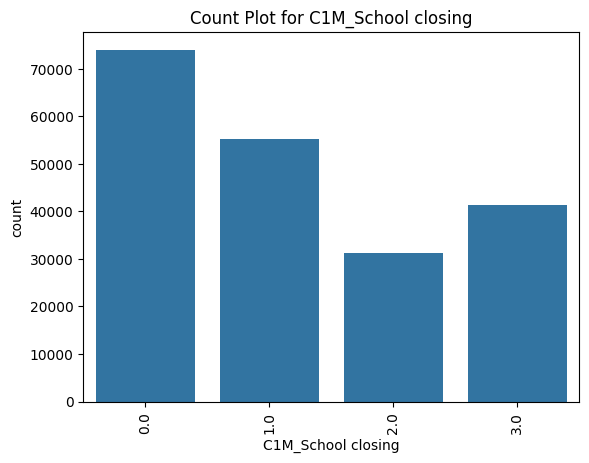

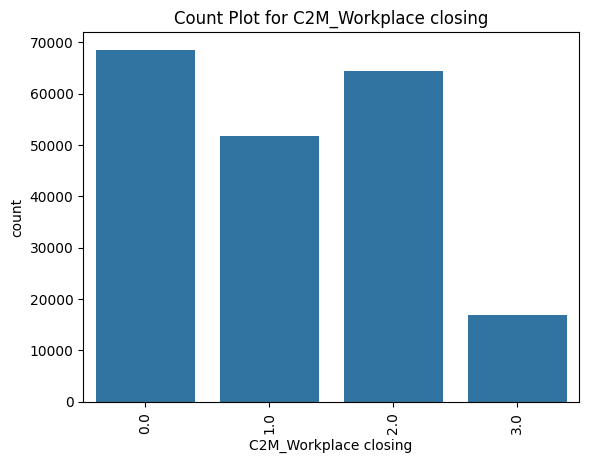

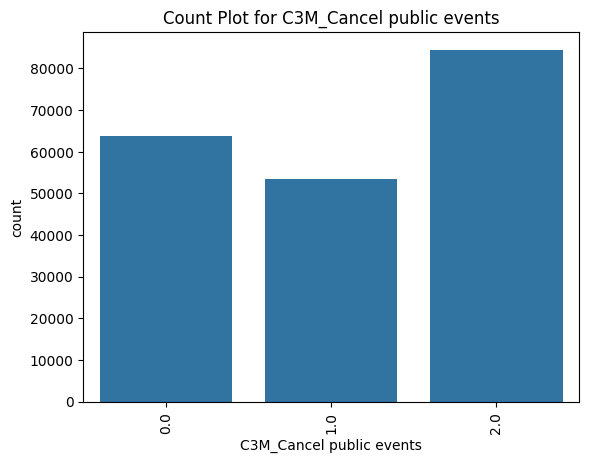

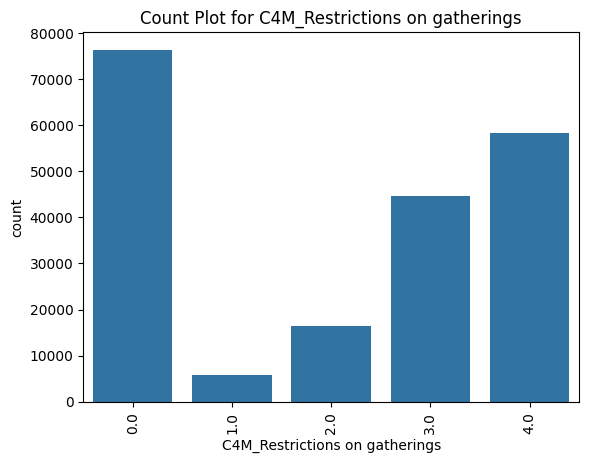

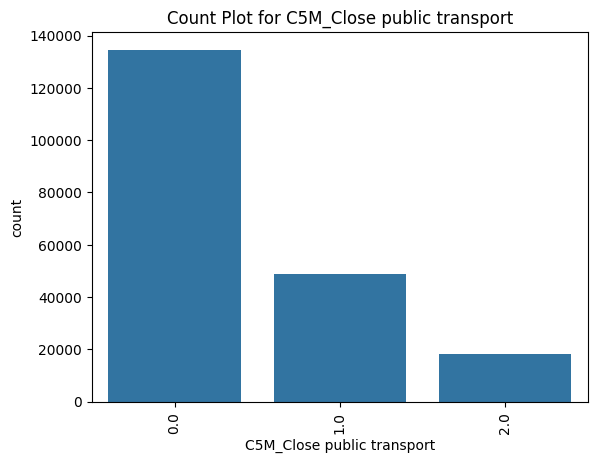

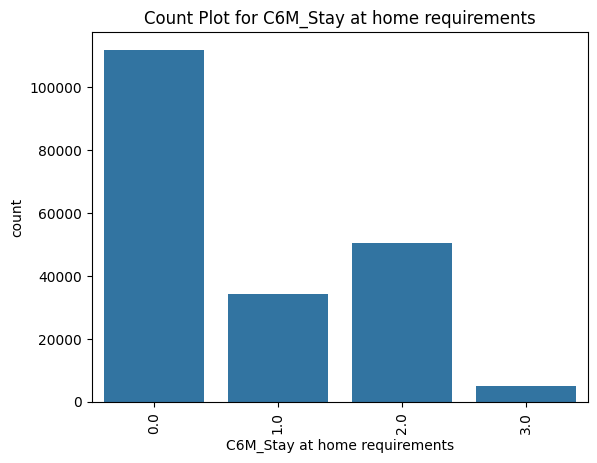

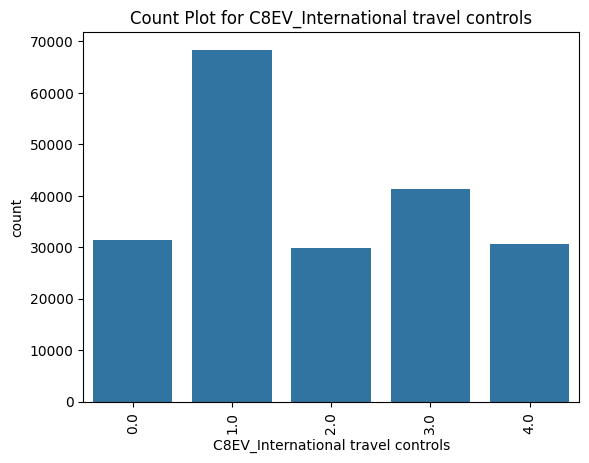

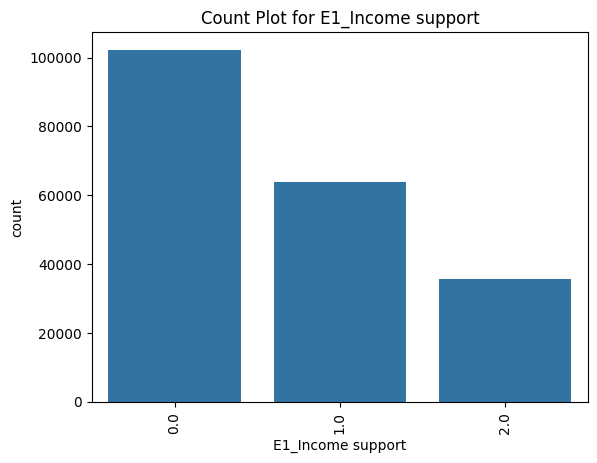

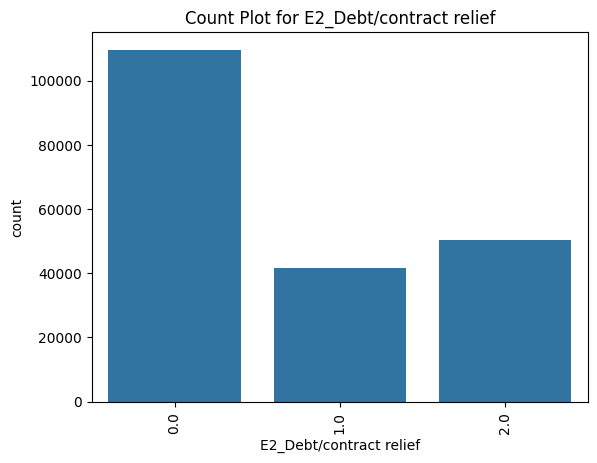

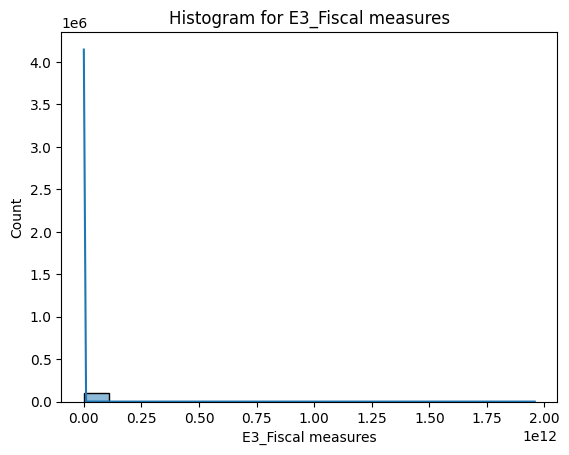

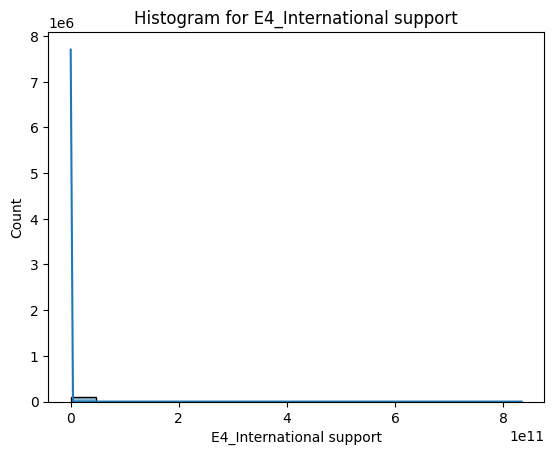

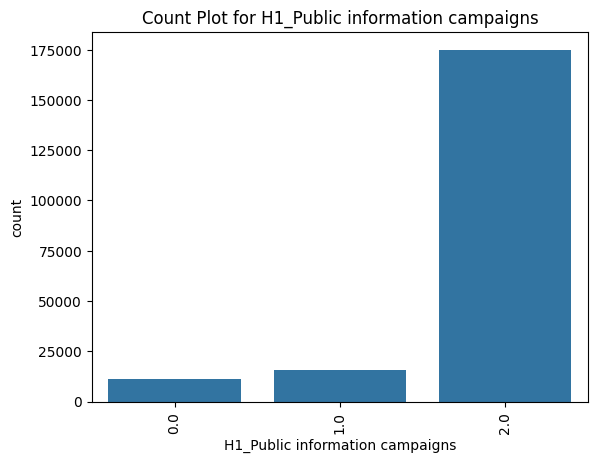

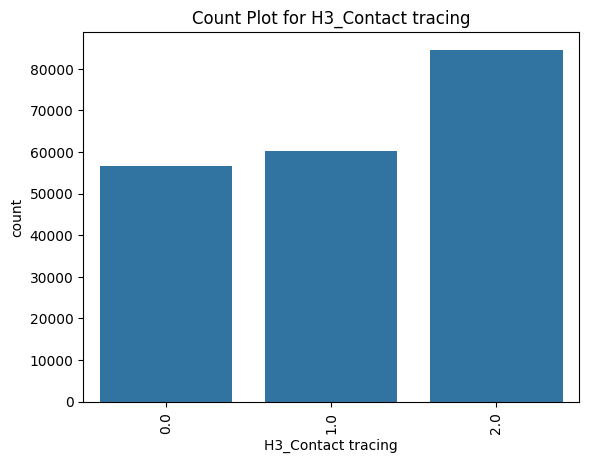

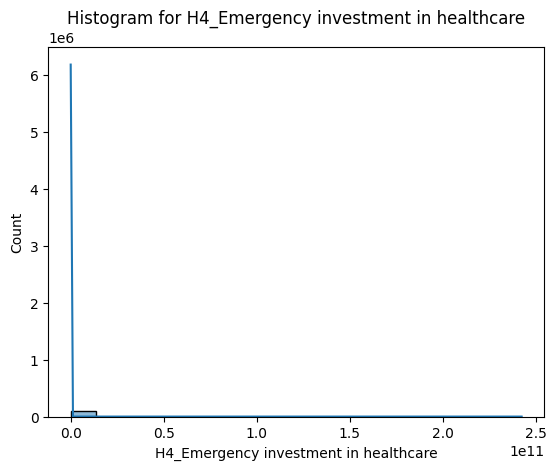

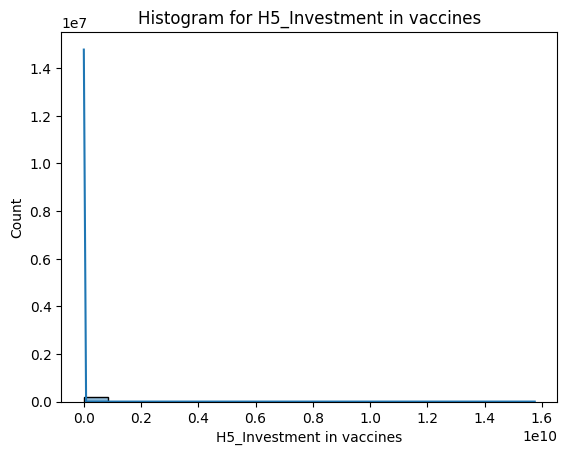

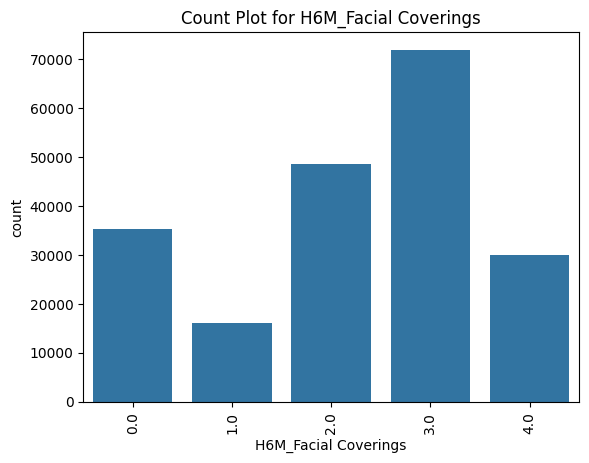

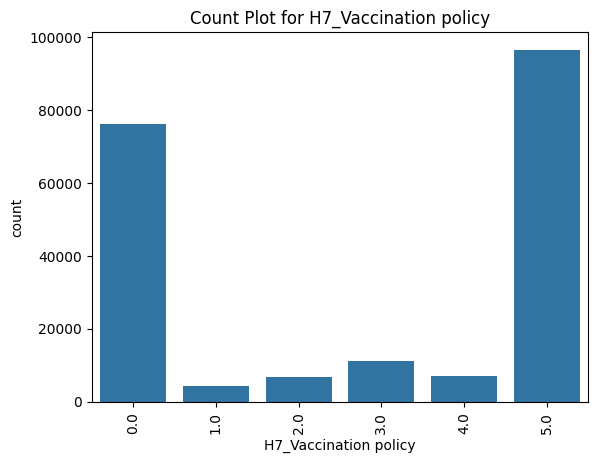

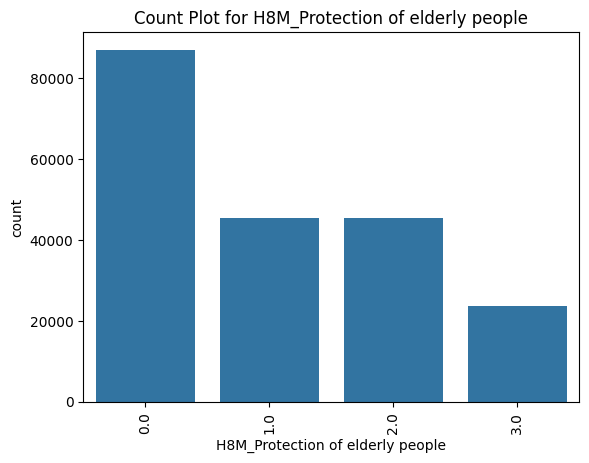

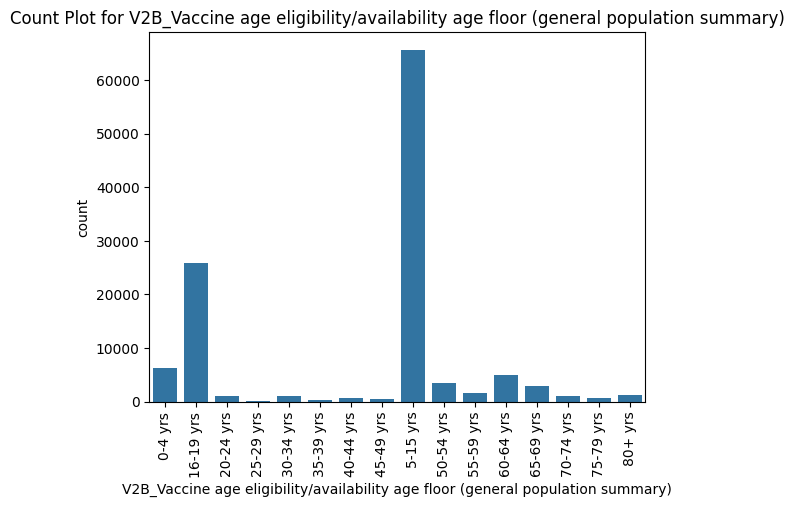

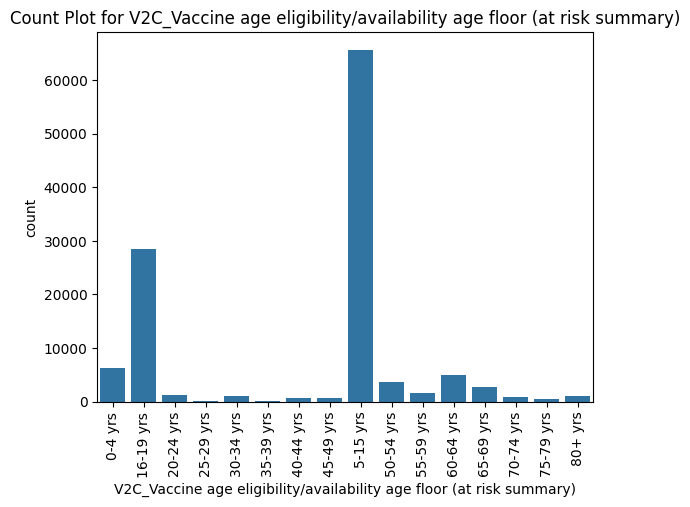

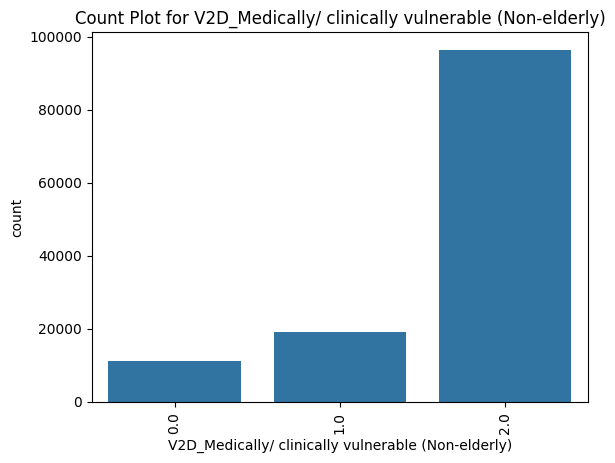

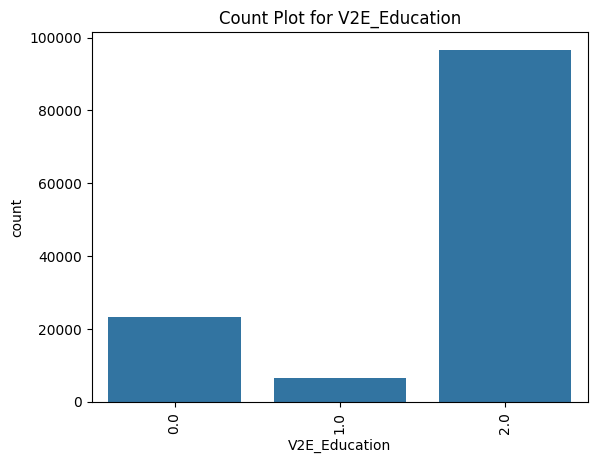

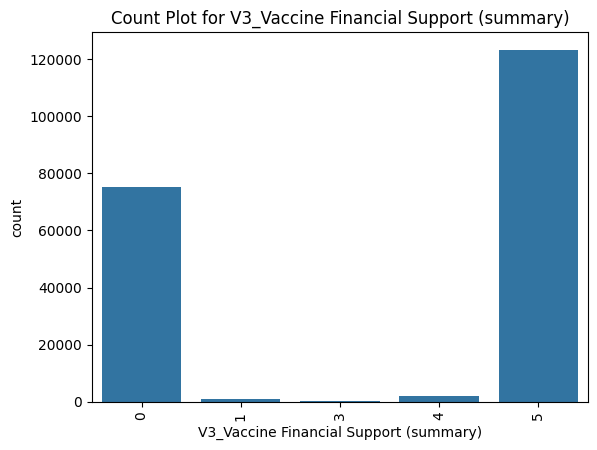

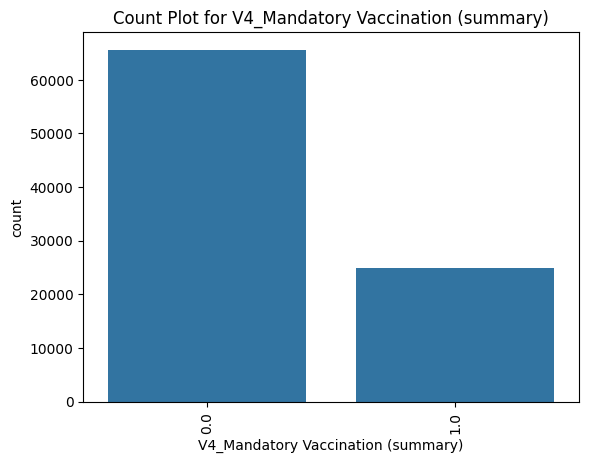

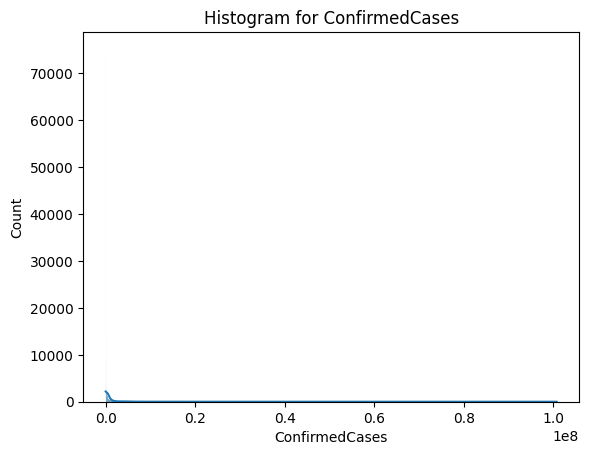

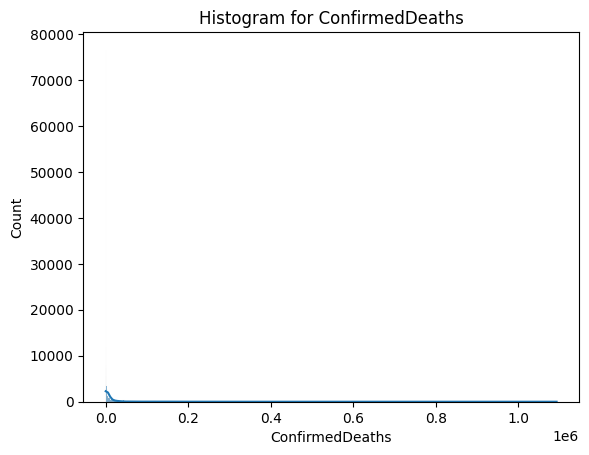

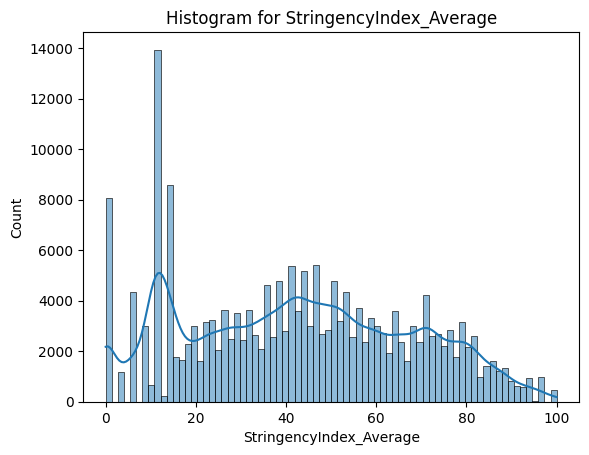

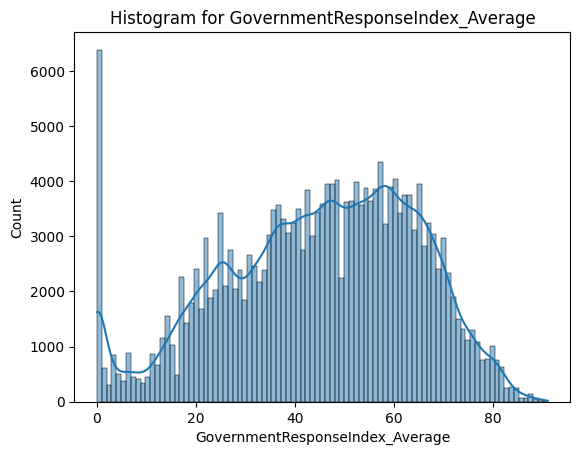

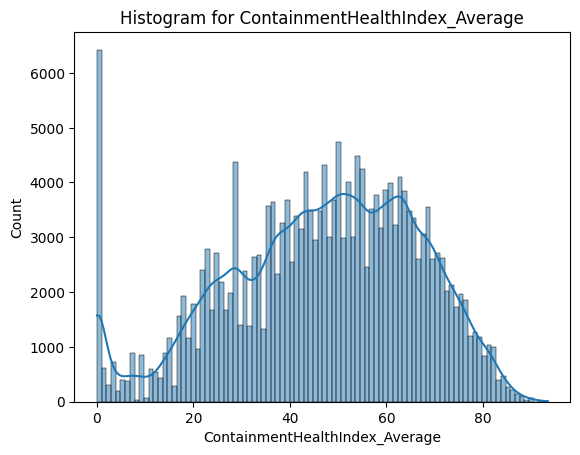

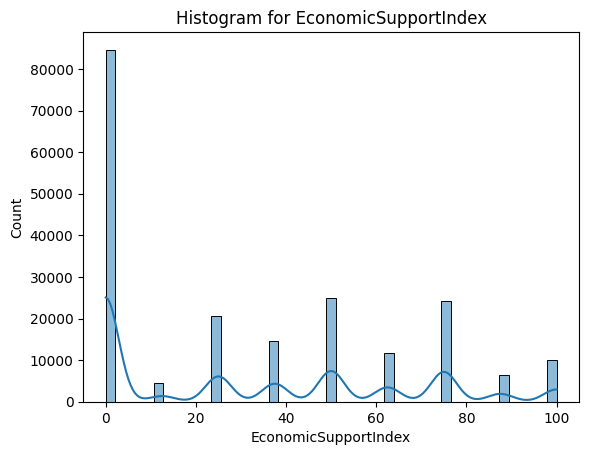

Start Date: 2020-01-01 00:00:00, End Date: 2022-12-31 00:00:00


In [71]:
#helper_df = pd.read_csv('/content/drive/MyDrive/CIC/data_description.csv')


helper_df = helper_df.rename(columns={
    helper_df.columns[0]: 'Column_Name',
    helper_df.columns[1]: 'Description',
    helper_df.columns[2]: 'Measurement',
helper_df.columns[3]: 'Coding'
}).iloc[1:]

def decide_and_plot(df, column, measurement_info):
    if measurement_info in ['Ordinal', 'Ordinal scale', 'Ordinal Scale', 'Binary Flag', 'Binary', 'Binary Flag for sectoral scope', 'Binary Flag for geographical scope', 'Categorical']:
        # Count plot for categorical and binary data
        sns.countplot(data=df, x=column)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)
        plt.show()
    elif measurement_info in ['USD', 'Number', 'Numeric', 'Numerical']:
        # Histogram for numerical data
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Histogram for {column}')
        plt.show()

# Exclude 'Date' and 'CountryName' from the plot generation process as per user request
exclude_columns = ['Date', 'CountryName']
columns_for_plot = [col for col in df.columns if col not in exclude_columns]

# Generate plots for each column based on the updated guidance
for column in columns_for_plot:
    measurement_type = helper_df[helper_df['Column_Name'] == column]['Measurement'].values
    if measurement_type.size > 0:
        decide_and_plot(df, column, measurement_type[0])



start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"Start Date: {start_date}, End Date: {end_date}")


#### Considering nationwide policies only

In [72]:
# Identify columns that end with 'Flag' but are not 'E1_Flag' or 'H7_Flag'
flag_columns = [col for col in df.columns if col.endswith('Flag') and col not in ['E1_Flag', 'H7_Flag']]

# Filter rows where any of the identified flag columns have a value of 1,
df = df[(df[flag_columns] == 1).any(axis=1)]

df = df.drop(columns=flag_columns)

df.shape

(192683, 40)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192683 entries, 75 to 201663
Data columns (total 40 columns):
 #   Column                                                                           Non-Null Count   Dtype         
---  ------                                                                           --------------   -----         
 0   CountryCode                                                                      192683 non-null  category      
 1   Date                                                                             192683 non-null  datetime64[ns]
 2   C1M_School closing                                                               192683 non-null  float64       
 3   C2M_Workplace closing                                                            192683 non-null  float64       
 4   C3M_Cancel public events                                                         192683 non-null  float64       
 5   C4M_Restrictions on gatherings                                

In [74]:
df.describe()

Date  C1M_School closing  \
count                         192683       192683.000000   
mean   2021-07-23 03:08:19.354899456            1.251947   
min              2020-01-01 00:00:00            0.000000   
25%              2020-11-03 00:00:00            0.000000   
50%              2021-07-23 00:00:00            1.000000   
75%              2022-04-11 00:00:00            2.000000   
max              2022-12-31 00:00:00            3.000000   
std                              NaN            1.136648   

       C2M_Workplace closing  C3M_Cancel public events  \
count          192683.000000             192683.000000   
mean                1.199976                  1.153994   
min                 0.000000                  0.000000   
25%                 0.000000                  0.000000   
50%                 1.000000                  1.000000   
75%                 2.000000                  2.000000   
max                 3.000000                  2.000000   
std                 0.976644                  0.836348   

       C4M_Restrictions on gatherings  C5M_Close public transport  \
count                   192683.000000               192683.000000   
mean                         2.107264                    0.442151   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          3.000000                    0.000000   
75%                          4.000000                    1.000000   
max                          4.000000                    2.000000   
std                          1.692173                    0.659763   

       C6M_Stay at home requirements  C7M_Restrictions on internal movement  \
count                  192683.000000                          192683.000000   
mean                        0.778771                               0.608471   
min                         0.000000                               0.000000   
25%                         0.000000                               0.000000   
50%                         0.000000                               0.000000   
75%                         2.000000                               1.000000   
max                         3.000000                               2.000000   
std                         0.922964                               0.855062   

       C8EV_International travel controls  E1_Income support       E1_Flag  \
count                       192683.000000      192683.000000  99353.000000   
mean                             1.932838           0.700794      0.625467   
min                              0.000000           0.000000      0.000000   
25%                              1.000000           0.000000      0.000000   
50%                              2.000000           1.000000      1.000000   
75%                              3.000000           1.000000      1.000000   
max                              4.000000           2.000000      1.000000   
std                              1.300082           0.761586      0.484005   

       E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
count            192683.000000        9.728700e+04              9.737100e+04   
mean                  0.739214        1.562134e+08              9.258856e+06   
min                   0.000000       -1.000000e-02             -2.000000e-02   
25%                   0.000000        0.000000e+00              0.000000e+00   
50%                   0.000000        0.000000e+00              0.000000e+00   
75%                   2.000000        0.000000e+00              0.000000e+00   
max                   2.000000        1.957600e+12              8.343531e+11   
std                   0.846396        1.163743e+10              2.676383e+09   

       H1_Public information campaigns  H2_Testing policy  H3_Contact tracing  \
count                    192683.000000      192683.000000       192683.000000   
mean                          1.896177          

### Imputation Strategy

Filling NaNs with mean, median or mode values at National Level. If that fails, a fallback is added to impute a global statistic.

May use it later.

In [75]:
'''
missing_values_count = df.isna().sum()
missing_values_count = missing_values_count[missing_values_count > 0]

column_data_types = df.dtypes

# use mean, median, or mode for imputation, based on the data type
imputation_strategy = {}
for column in missing_values_count.index:
    if column_data_types[column] in ['float64', 'int64']:
        imputation_strategy[column] = 'median'
    else:
        imputation_strategy[column] = 'mode'

# imputation with a fallback
def impute_with_fallback(series, strategy):
    if strategy == 'median':
        global_fallback = series.median()
        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))
    elif strategy == 'mode':
        global_fallback = series.mode().iloc[0] if not series.mode().empty else None
        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))

for column, strategy in imputation_strategy.items():
    if strategy == 'median':
        df[column] = impute_with_fallback(df[column], strategy)
    elif strategy == 'mode':
        df[column] = df[column].astype('str')
        df[column] = impute_with_fallback(df[column], strategy)
        df[column] = df[column].replace('nan', np.nan)


df.isna().sum()

#still need to do it for V2B and V2C
missing_values_after_imputation = df.isna().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]
for column in missing_values_after_imputation.index:
    column_mode = df[column].mode()
    mode_value = column_mode.iloc[0] if not column_mode.empty else np.nan
    df[column] = df[column].fillna(mode_value)

df.isna().sum()
'''

"\nmissing_values_count = df.isna().sum()\nmissing_values_count = missing_values_count[missing_values_count > 0]\n\ncolumn_data_types = df.dtypes\n\n# use mean, median, or mode for imputation, based on the data type\nimputation_strategy = {}\nfor column in missing_values_count.index:\n    if column_data_types[column] in ['float64', 'int64']:\n        imputation_strategy[column] = 'median'\n    else:\n        imputation_strategy[column] = 'mode'\n\n# imputation with a fallback\ndef impute_with_fallback(series, strategy):\n    if strategy == 'median':\n        global_fallback = series.median()\n        return series.fillna(series.groupby(df['CountryName']).transform('median').fillna(global_fallback))\n    elif strategy == 'mode':\n        global_fallback = series.mode().iloc[0] if not series.mode().empty else None\n        return series.fillna(series.groupby(df['CountryName']).transform(lambda x: x.mode()[0] if not x.mode().empty else global_fallback))\n\nfor column, strategy in imputati

####Fill NaNs with 0.

In [76]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.loc[:, col] = df[col].fillna(0)
    elif pd.api.types.is_categorical_dtype(df[col]):
        if '0' not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories('0')
        df.loc[:, col] = df[col].fillna('0')

/var/folders/hw/nslmzggs3pzbg77w_myl2vcm0000gn/T/ipykernel_34621/1253755982.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]):


In [77]:
df.dtypes

CountryCode                                                                              category
Date                                                                               datetime64[ns]
C1M_School closing                                                                        float64
C2M_Workplace closing                                                                     float64
C3M_Cancel public events                                                                  float64
C4M_Restrictions on gatherings                                                            float64
C5M_Close public transport                                                                float64
C6M_Stay at home requirements                                                             float64
C7M_Restrictions on internal movement                                                     float64
C8EV_International travel controls                                                        float64
E1_Income support   

### Correlation Matrix

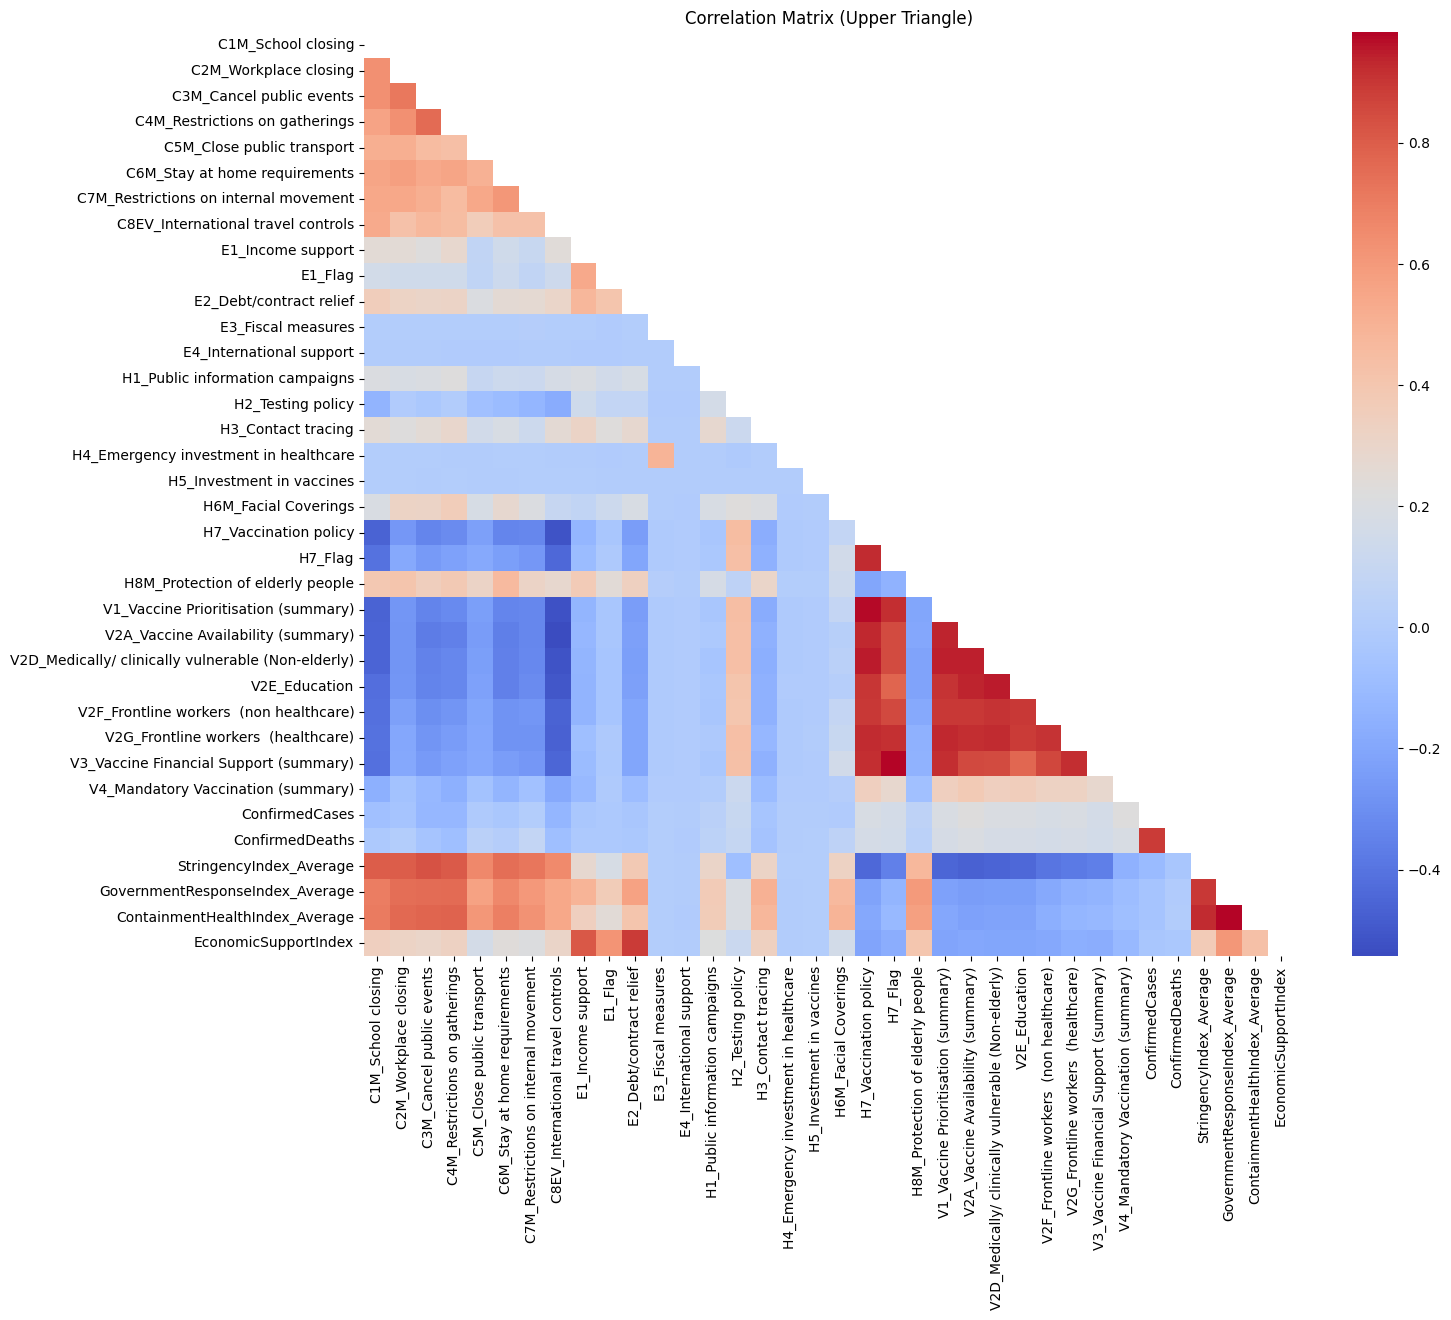

Columns: H7_Vaccination policy and V2F_Frontline workers  (non healthcare), Correlation Coefficient: 0.90
Columns: C2M_Workplace closing and StringencyIndex_Average, Correlation Coefficient: 0.80
Columns: H7_Vaccination policy and StringencyIndex_Average, Correlation Coefficient: -0.45
Columns: H7_Flag and V2D_Medically/ clinically vulnerable (Non-elderly), Correlation Coefficient: 0.85
Columns: C2M_Workplace closing and C4M_Restrictions on gatherings, Correlation Coefficient: 0.63
Columns: C2M_Workplace closing and C3M_Cancel public events, Correlation Coefficient: 0.71
Columns: C8EV_International travel controls and V2D_Medically/ clinically vulnerable (Non-elderly), Correlation Coefficient: -0.51
Columns: V1_Vaccine Prioritisation (summary) and V2D_Medically/ clinically vulnerable (Non-elderly), Correlation Coefficient: 0.94
Columns: C2M_Workplace closing and H8M_Protection of elderly people, Correlation Coefficient: 0.41
Columns: C4M_Restrictions on gatherings and C8EV_Internationa

145

In [78]:
corr_matrix = df.corr(numeric_only=True)

# Mask to display only one half
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False) # since we've too many variables here. However, we shall display pairs having a correlation coefficient more or less than a certain threshold.
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

# pairs of columns with a correlation coefficient >= 0.4 or <= -0.4
high_correlation_pairs = []

for row in corr_matrix.columns:
    for col in corr_matrix.columns:
        if row != col:
            if corr_matrix.loc[row, col] >= 0.4 or corr_matrix.loc[row, col] <= -0.4:
                high_correlation_pairs.append((row, col, corr_matrix.loc[row, col]))

unique_pairs = set()
for pair in high_correlation_pairs:
    sorted_pair = tuple(sorted([pair[0], pair[1]])) + (pair[2],)
    unique_pairs.add(sorted_pair)

for pair in unique_pairs:
    print(f"Columns: {pair[0]} and {pair[1]}, Correlation Coefficient: {pair[2]:.2f}")

len(unique_pairs)

In [79]:
aggregation_funcs = {}
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs[column] = 'count'
    elif pd.api.types.is_datetime64_dtype(df[column]):
      continue
    else:
      aggregation_funcs[column] = 'sum'

/var/folders/hw/nslmzggs3pzbg77w_myl2vcm0000gn/T/ipykernel_34621/3681371754.py:3: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):


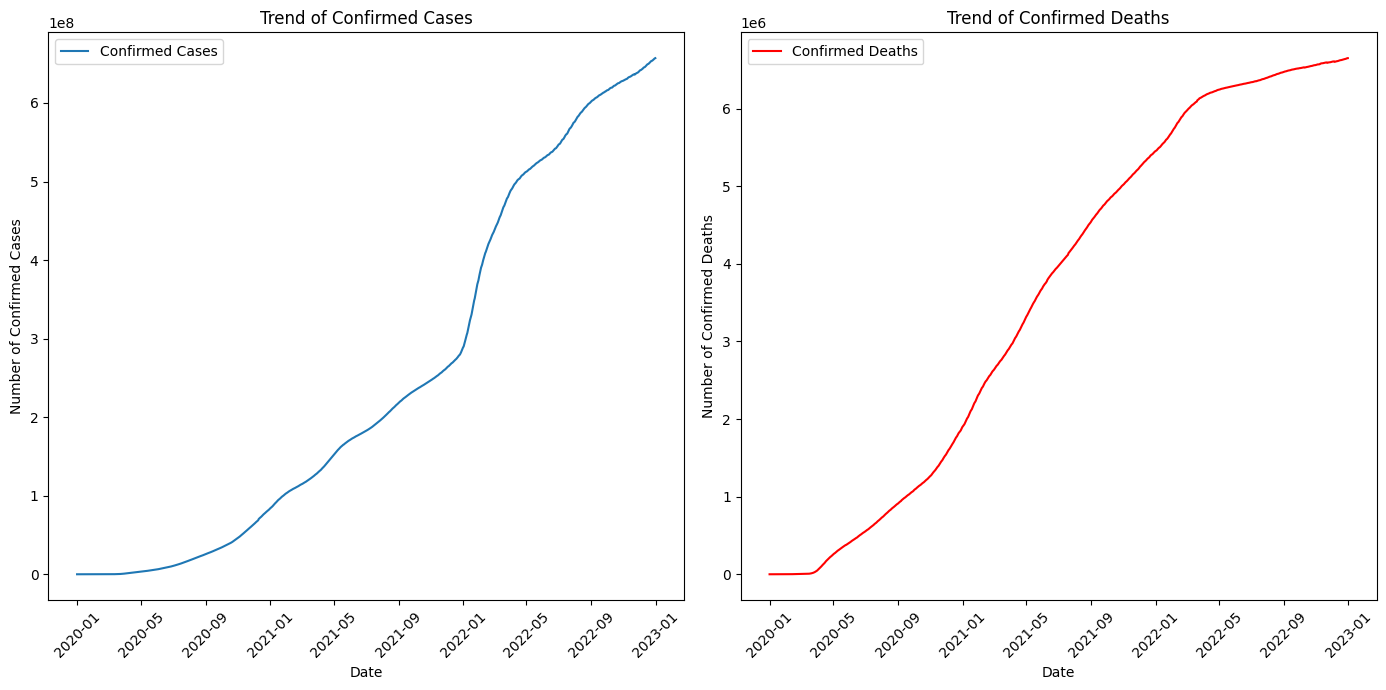

In [80]:
# Aggregating data by date
df_agg_date = df.groupby('Date').agg(aggregation_funcs)

# Plotting ConfirmedCases and ConfirmedDeaths
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedCases'], label='Confirmed Cases')
plt.title('Trend of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_agg_date.index, df_agg_date['ConfirmedDeaths'], label='Confirmed Deaths', color='red')
plt.title('Trend of Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Deaths')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [81]:
print('The total number of covid-19 cases in our dataset are {}'.format(df_agg_date['ConfirmedCases'].iloc[-1]))

The total number of covid-19 cases in our dataset are 657048606.0


In [82]:
df_agg_date.describe()

CountryCode  C1M_School closing  C2M_Workplace closing  \
count  1096.000000         1096.000000            1096.000000   
mean    175.805657          220.099453             210.962591   
std      30.959564          140.518330             103.730752   
min       4.000000            0.000000               0.000000   
25%     183.000000           69.000000             103.500000   
50%     184.000000          220.500000             248.000000   
75%     184.000000          310.000000             285.000000   
max     184.000000          534.000000             433.000000   

       C3M_Cancel public events  C4M_Restrictions on gatherings  \
count               1096.000000                     1096.000000   
mean                 202.878650                      370.468978   
std                   99.298466                      207.379191   
min                    0.000000                        0.000000   
25%                  100.000000                      135.000000   
50%                  245.000000                      484.500000   
75%                  276.000000                      546.250000   
max                  355.000000                      607.000000   

       C5M_Close public transport  C6M_Stay at home requirements  \
count                 1096.000000                    1096.000000   
mean                    77.732664                     136.912409   
std                     49.860615                      91.518382   
min                      0.000000                       0.000000   
25%                     25.750000                      28.750000   
50%                     91.000000                     177.000000   
75%                    107.000000                     207.000000   
max                    216.000000                     327.000000   

       C7M_Restrictions on internal movement  \
count                            1096.000000   
mean                              106.972628   
std                                73.828254   
min                                 0.000000   
25%                                27.000000   
50%                               125.000000   
75%                               157.000000   
max                               298.000000   

       C8EV_International travel controls  E1_Income support      E1_Flag  \
count                         1096.000000        1096.000000  1096.000000   
mean                           339.803832         123.203467    56.698905   
std                            178.640607          54.702012    21.319287   
min                              1.000000           0.000000     0.000000   
25%                            167.000000          79.000000    39.000000   
50%                            362.500000         131.500000    66.000000   
75%                            461.000000         169.000000    72.000000   
max                            666.000000         192.000000    82.000000   

       E2_Debt/contract relief  E3_Fiscal measures  E4_International support  \
count              1096.000000        1.096000e+03              1.096000e+03   
mean                129.958029        1.386636e+10              8.225767e+08   
std                  66.606101        1.176816e+11              2.523747e+10   
min                   0.000000       -1.000000e-02             -2.000000e-02   
25%                  63.000000        0.000000e+00              0.000000e+00   
50%                 135.000000        0.000000e+00              0.000000e+00   
75%                 186.250000        0.000000e+00              0.000000e+00   
max                 225.000000        2.387742e+12              8.347756e+11   

       H1_Public information campaigns  H2_Testing policy  H3_Contact tracing  \
count                      1096.000000        1096.000000         1096.000000   
mean                        333.358577         382.726277          208.646898   
std                          64.826612         111.397056           67.494186   
min                           5.

In [83]:
df_agg_date.tail()
df_monthly = df_agg_date.resample('M').mean()
df_monthly.head(25)
#df_monthly.tail(25)

/var/folders/hw/nslmzggs3pzbg77w_myl2vcm0000gn/T/ipykernel_34621/85849859.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_agg_date.resample('M').mean()


CountryCode  C1M_School closing  C2M_Workplace closing  \
Date                                                                 
2020-01-31    21.903226            2.419355               1.129032   
2020-02-29    89.655172           25.724138              10.482759   
2020-03-31   161.258065          298.096774             167.645161   
2020-04-30   184.000000          528.300000             418.466667   
2020-05-31   184.000000          491.709677             355.032258   
2020-06-30   184.000000          426.333333             289.366667   
2020-07-31   184.000000          393.709677             268.290323   
2020-08-31   184.000000          389.903226             285.483871   
2020-09-30   184.000000          346.166667             275.700000   
2020-10-31   184.000000          311.516129             261.290323   
2020-11-30   184.000000          302.300000             271.600000   
2020-12-31   184.000000          315.064516             286.677419   
2021-01-31   184.000000          329.935484             296.322581   
2021-02-28   184.000000          302.142857             292.214286   
2021-03-31   184.000000          287.354839             301.806452   
2021-04-30   183.400000          286.033333             306.633333   
2021-05-31   183.419355          263.064516             293.806452   
2021-06-30   183.700000          262.333333             278.300000   
2021-07-31   184.000000          254.096774             266.548387   
2021-08-31   184.000000          239.903226             254.193548   
2021-09-30   184.000000          217.066667             248.566667   
2021-10-31   184.000000          193.774194             231.709677   
2021-11-30   184.000000          183.966667             223.866667   
2021-12-31   184.000000          186.290323             220.161290   
2022-01-31   184.000000          192.806452             234.870968   

            C3M_Cancel public events  C4M_Restrictions on gatherings  \
Date                                                                   
2020-01-31                  1.741935                        1.225806   
2020-02-29                 14.758621                        8.551724   
2020-03-31                202.161290                      262.000000   
2020-04-30                351.333333                      596.566667   
2020-05-31                343.516129                      596.096774   
2020-06-30                306.200000                      520.733333   
2020-07-31                277.903226                      491.000000   
2020-08-31                273.483871                      501.677419   
2020-09-30                272.066667                      502.233333   
2020-10-31                266.709677                      520.645161   
2020-11-30                268.966667                      540.166667   
2020-12-31                276.258065                      549.612903   
2021-01-31                278.838710                      561.064516   
2021-02-28                278.750000                      563.071429   
2021-03-31                284.967742                      566.354839   
2021-04-30                285.733333                      568.333333   
2021-05-31                276.612903                      562.709677   
2021-06-30                264.266667                      549.233333   
2021-07-31                254.451613                      531.193548   
2021-08-31                245.096774                      517.451613   
2021-09-30                246.800000                      488.133333   
2021-10-31                241.032258                      459.741935   
2021-11-30                229.833333                      431.833333   
2021-12-31                222.612903                      426.548387   
2022-01-31                223.290323                      427.548387   

            C5M_Close public transport  C6M_Stay at home requirements  \
Date                                                                    
2020-01-31                    

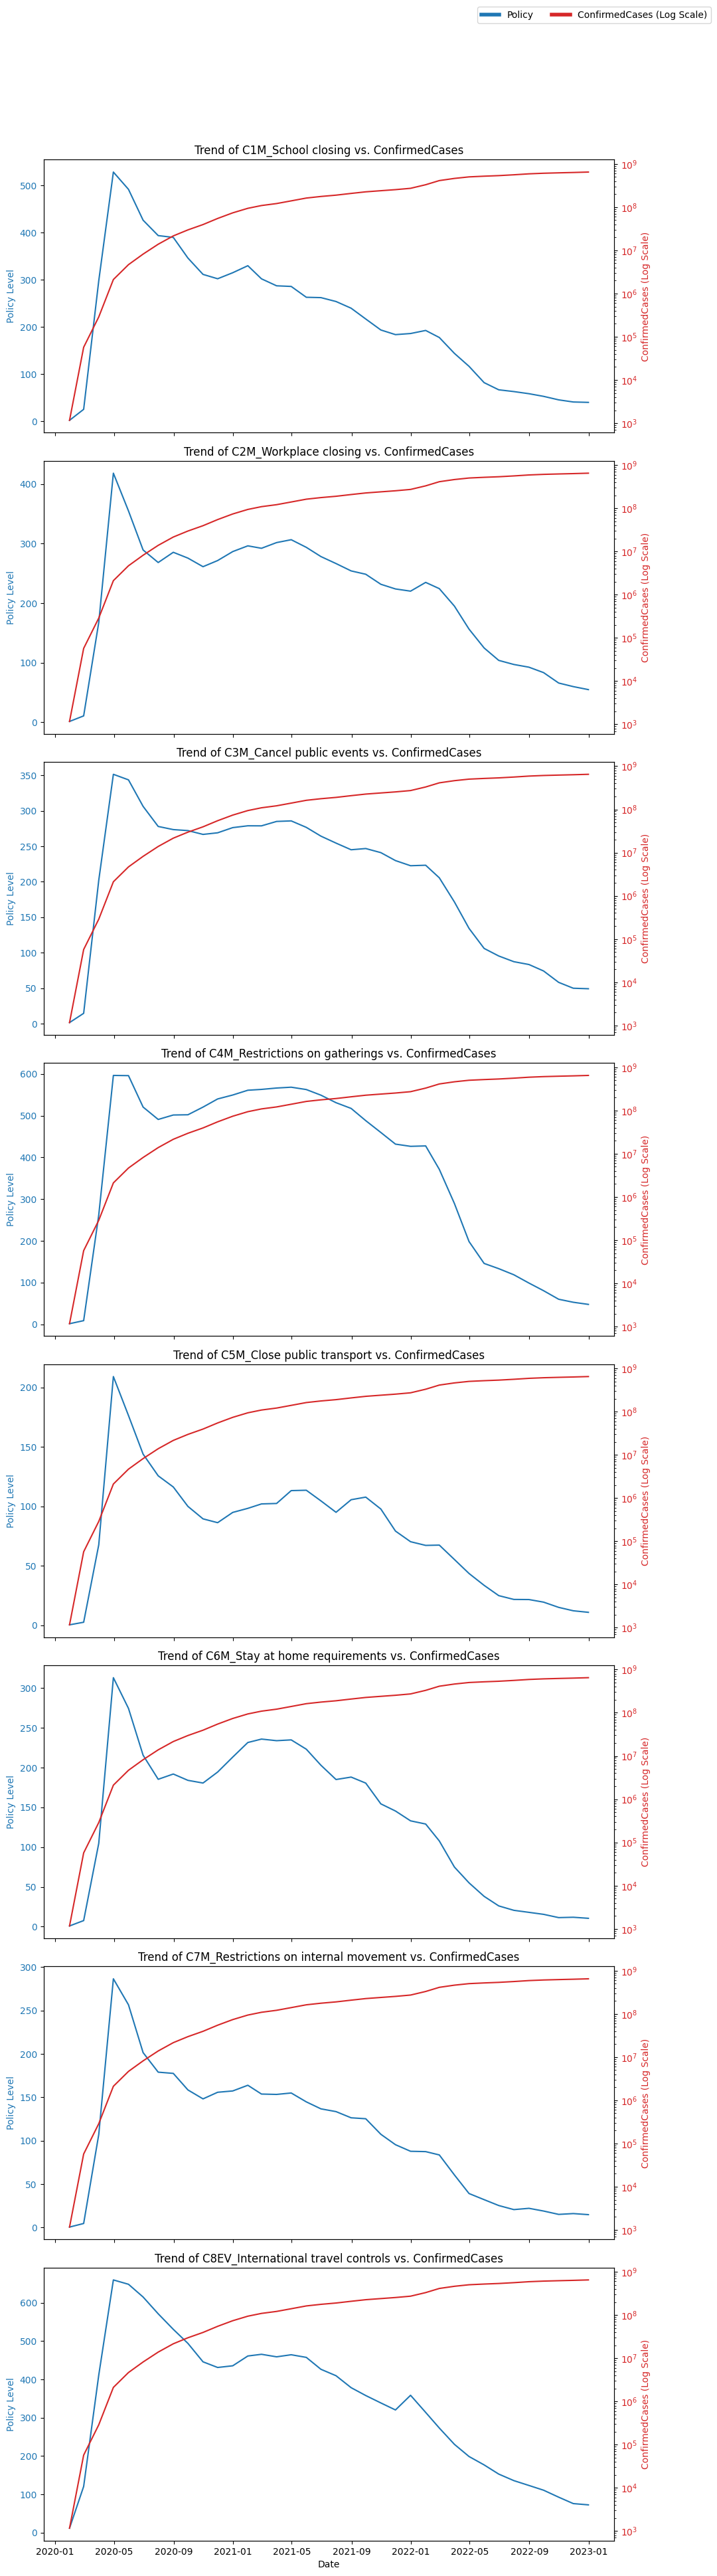

In [84]:
containment_policy_columns = ['C1M_School closing', 'C2M_Workplace closing', 'C3M_Cancel public events',
                  'C4M_Restrictions on gatherings', 'C5M_Close public transport',
                  'C6M_Stay at home requirements', 'C7M_Restrictions on internal movement',
                  'C8EV_International travel controls']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(containment_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



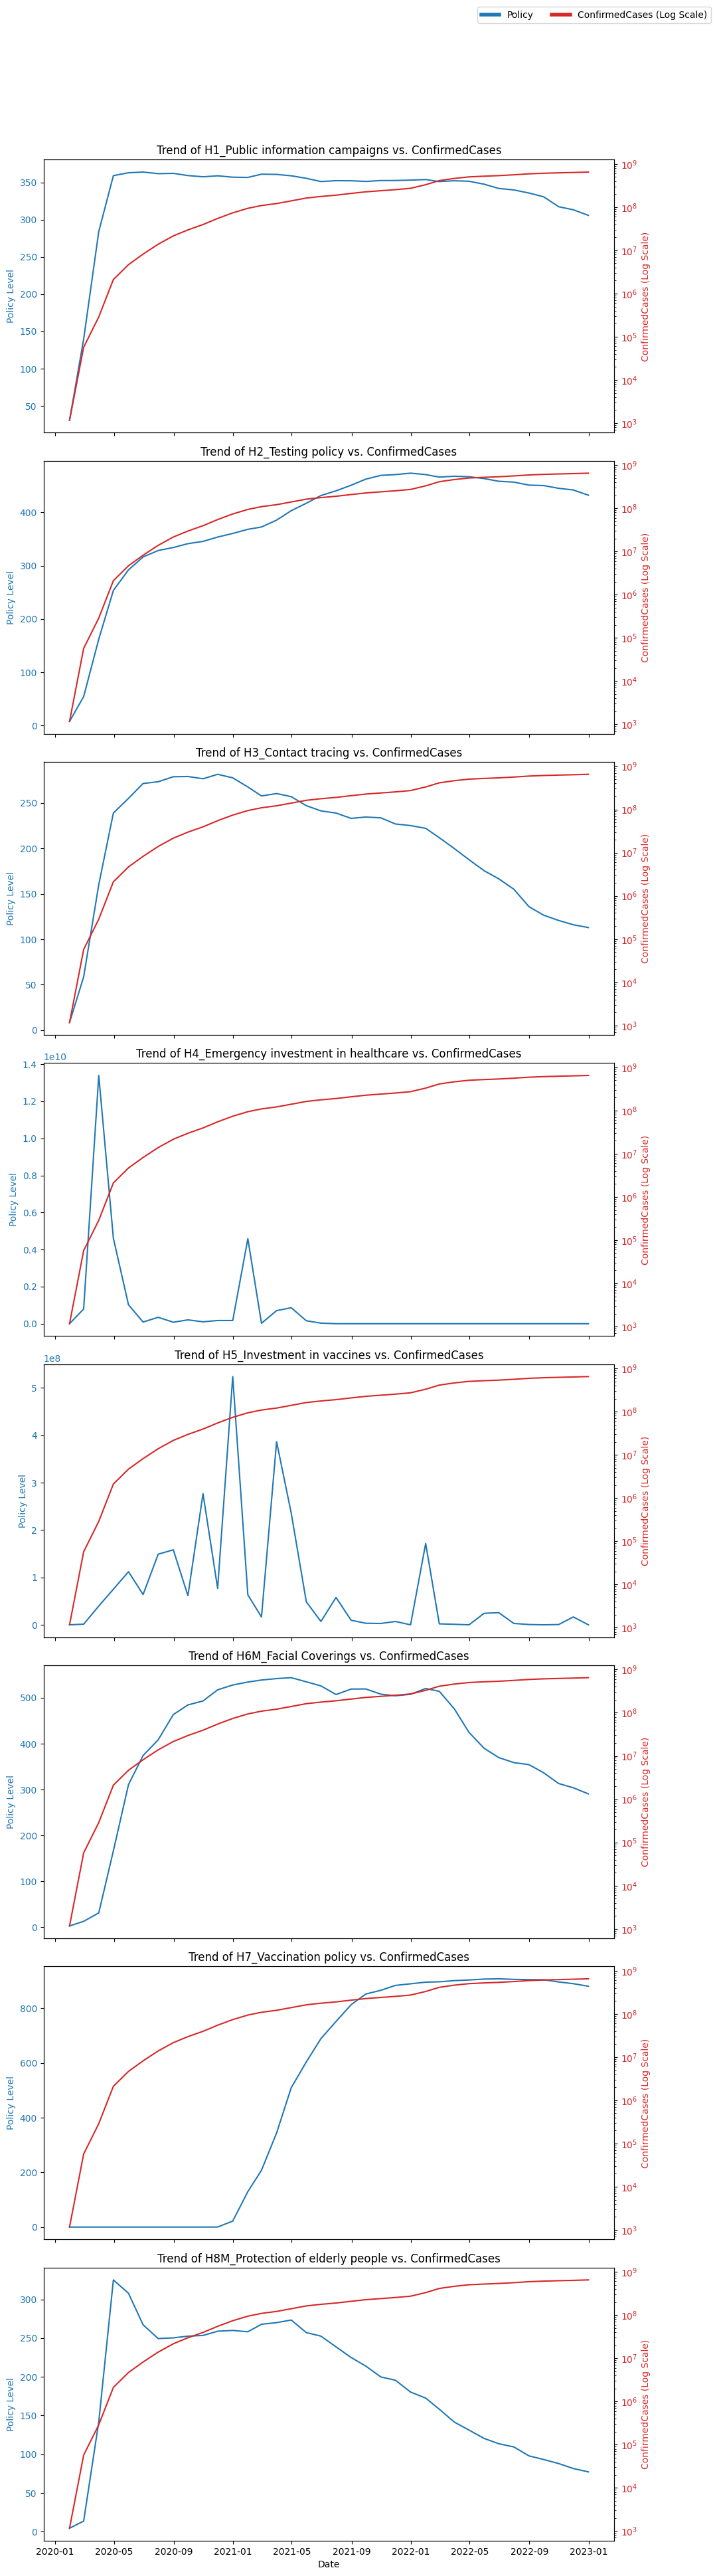

In [85]:
health_policy_columns = ['H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'H6M_Facial Coverings', 'H7_Vaccination policy', 'H8M_Protection of elderly people']

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40), sharex=True)

for i, policy in enumerate(health_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')



custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()





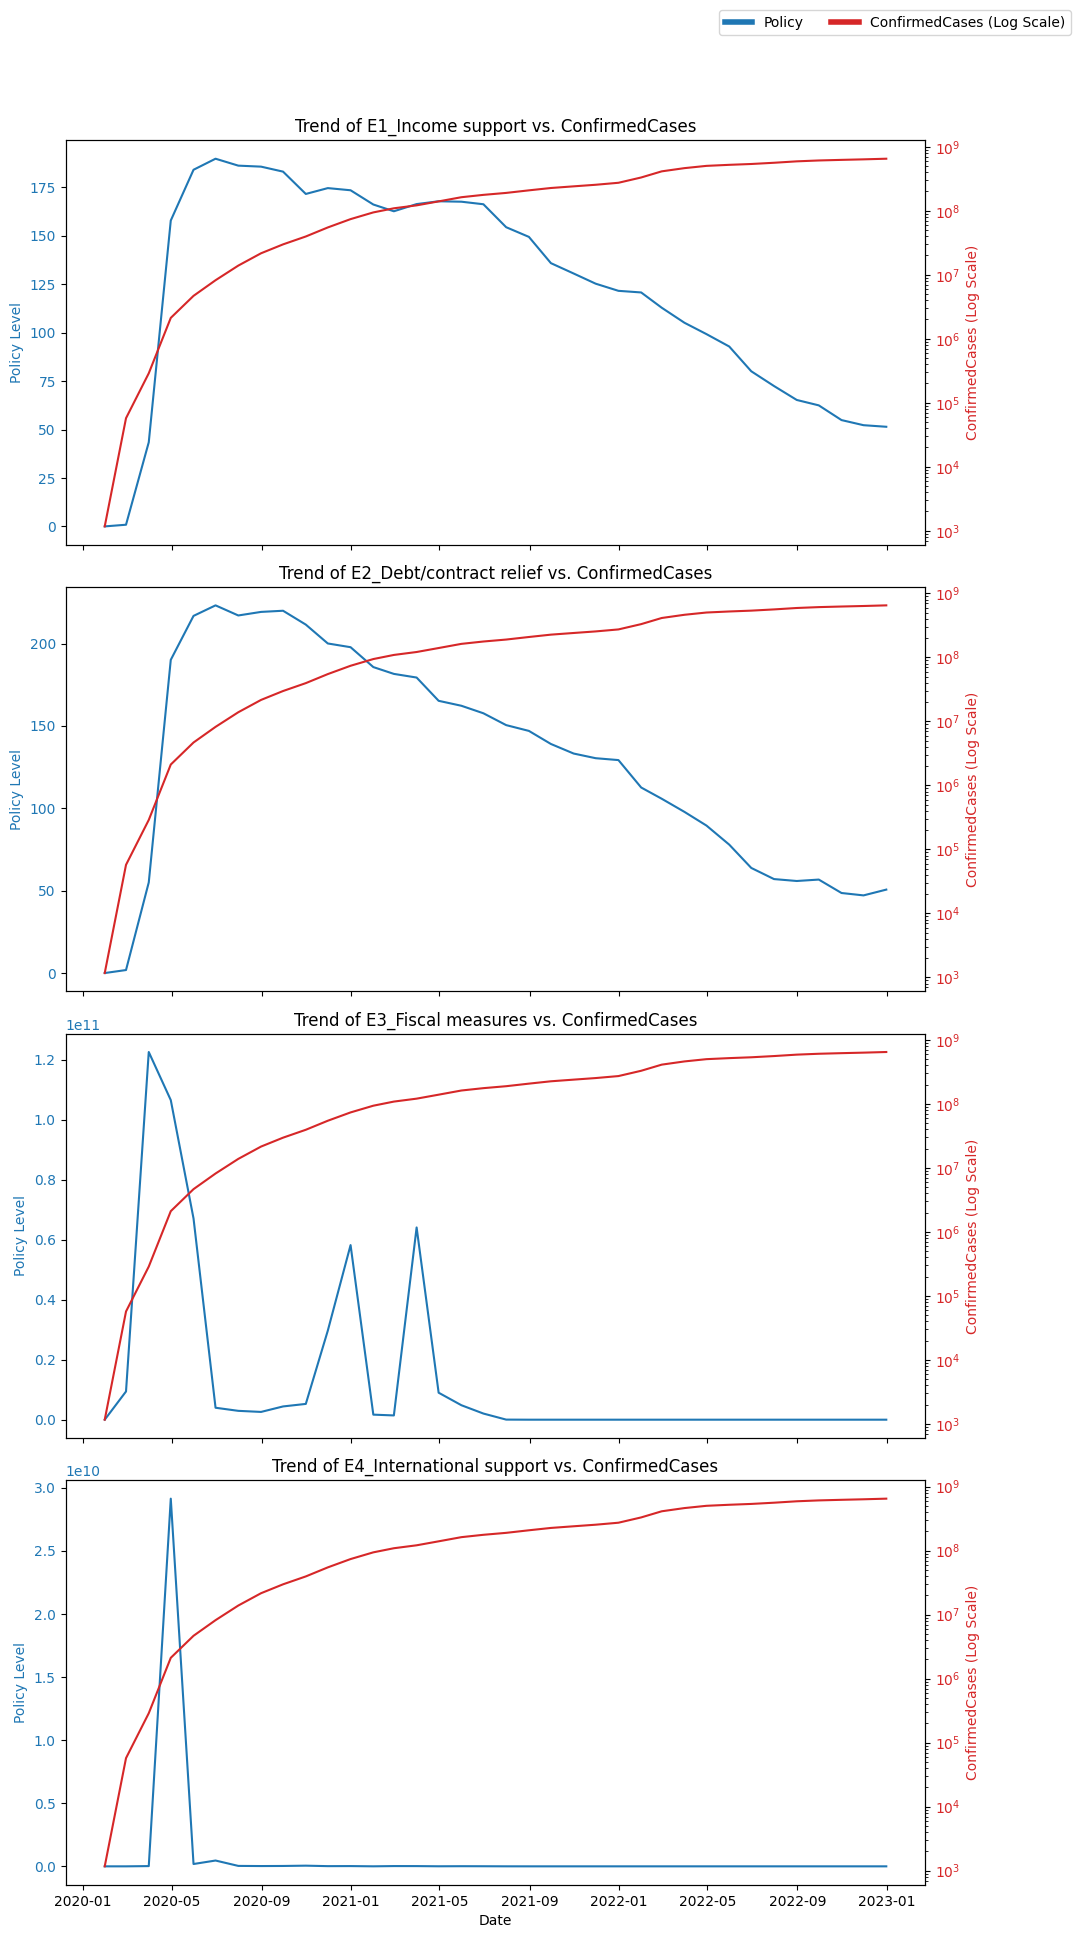

In [86]:
economic_policy_columns = ['E1_Income support','E2_Debt/contract relief', 'E3_Fiscal measures', 'E4_International support']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(economic_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [87]:
df_monthly.head(1)

CountryCode  C1M_School closing  C2M_Workplace closing  \
Date                                                                 
2020-01-31    21.903226            2.419355               1.129032   

            C3M_Cancel public events  C4M_Restrictions on gatherings  \
Date                                                                   
2020-01-31                  1.741935                        1.225806   

            C5M_Close public transport  C6M_Stay at home requirements  \
Date                                                                    
2020-01-31                    0.451613                        0.83871   

            C7M_Restrictions on internal movement  \
Date                                                
2020-01-31                               0.451613   

            C8EV_International travel controls  E1_Income support  E1_Flag  \
Date                                                                         
2020-01-31                           11.548387                0.0      0.0   

            E2_Debt/contract relief  E3_Fiscal measures  \
Date                                                      
2020-01-31                      0.0                 0.0   

            E4_International support  H1_Public information campaigns  \
Date                                                                    
2020-01-31                       0.0                        30.612903   

            H2_Testing policy  H3_Contact tracing  \
Date                                                
2020-01-31           7.580645            8.387097   

            H4_Emergency investment in healthcare  H5_Investment in vaccines  \
Date                                                                           
2020-01-31                                    0.0                7966.483871   

            H6M_Facial Coverings  H7_Vaccination policy  H7_Flag  \
Date                                                               
2020-01-31              2.806452                    0.0      0.0   

            H8M_Protection of elderly people  \
Date                                           
2020-01-31                          4.612903   

            V1_Vaccine Prioritisation (summary)  \
Date                                              
2020-01-31                                  0.0   

            V2A_Vaccine Availability (summary)  \
Date                                             
2020-01-31                                 0.0   

            V2B_Vaccine age eligibility/availability age floor (general population summary)  \
Date                                                                                          
2020-01-31                                          21.903226                                 

            V2C_Vaccine age eligibility/availability age floor (at risk summary)  \
Date                                                                               
2020-01-31                                          21.903226                      

            V2D_Medically/ clinically vulnerable (Non-elderly)  V2E_Education  \
Date                                                                            
2020-01-31                                                0.0             0.0   

            V2F_Frontline workers  (non healthcare)  \
Date                                                  
2020-01-31                                      0.0   

            V2G_Frontline workers  (healthcare)  \
Date                                              
2020-01-31                                  0.0   

            V3_Vaccine Financial Support (summary)  \
Date                                                 
2020-01-31                                0.258065   

            V4_Mandatory Vaccination (summary)  ConfirmedCases  \
Date                                                             
2020-01-31                                 0.0     1166.516129   

            ConfirmedDeaths  StringencyIndex_Avera

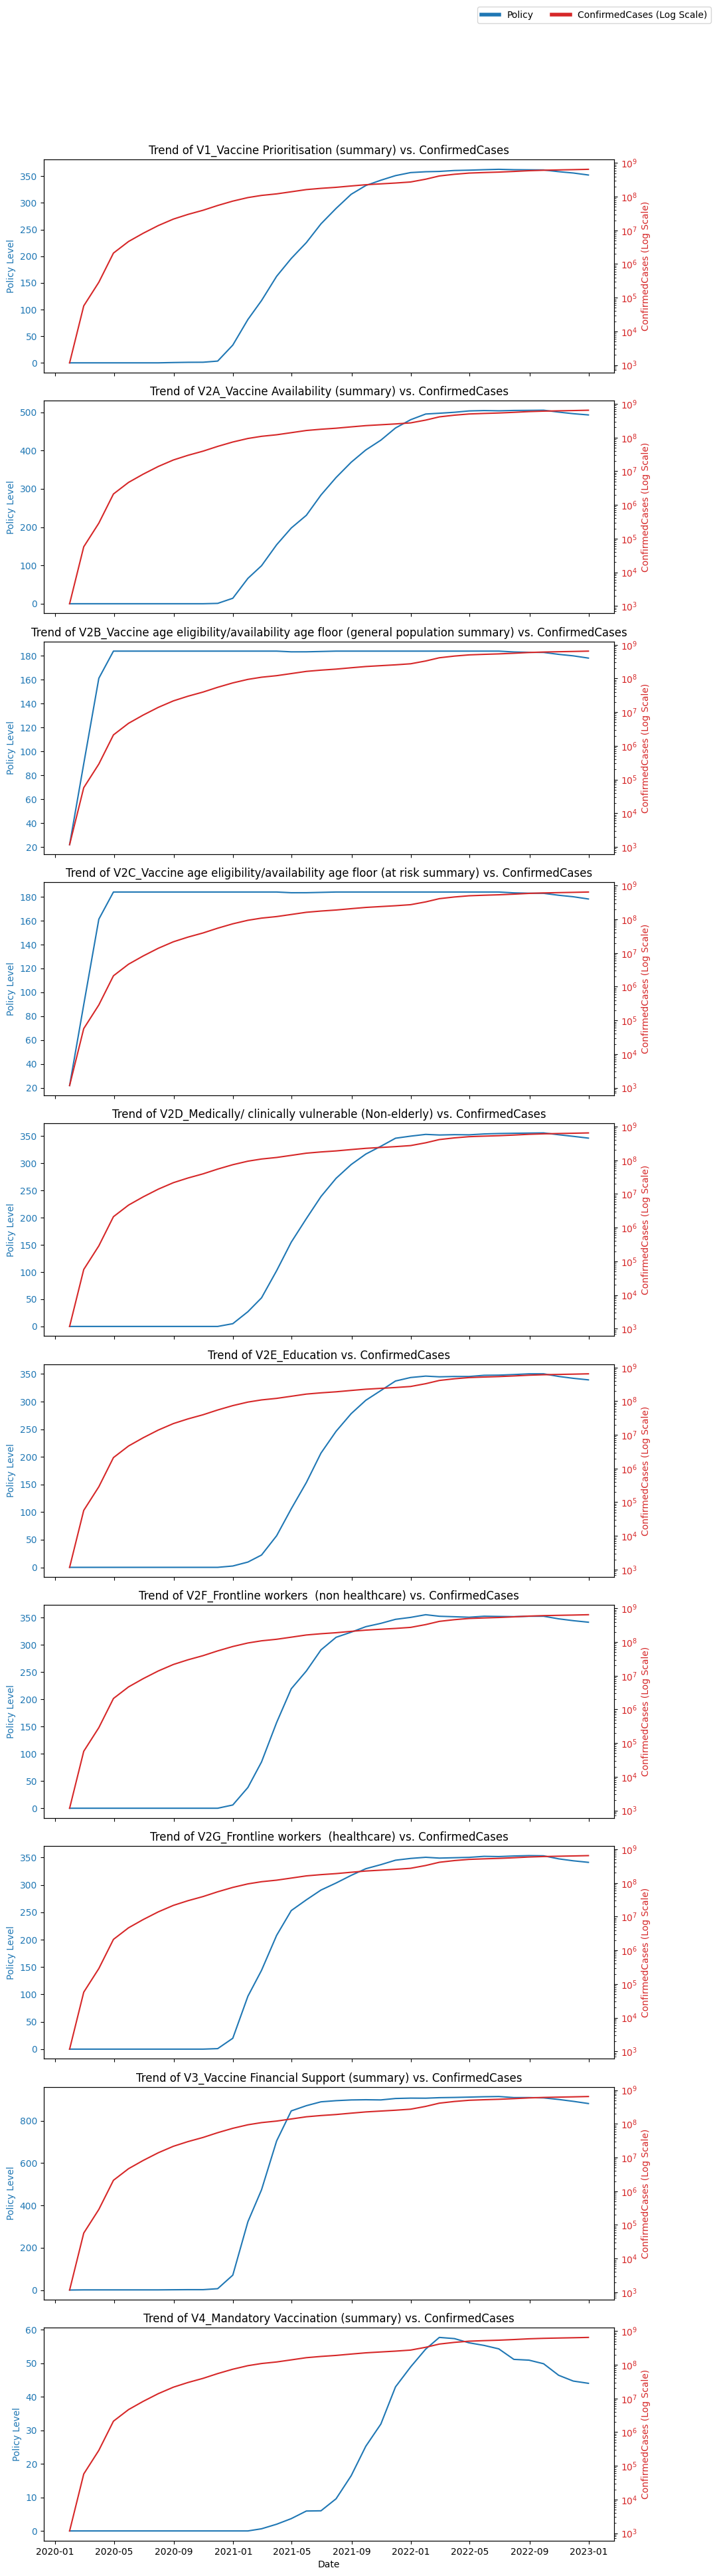

In [88]:
vaccination_policy_columns = ['V1_Vaccine Prioritisation (summary)', 'V2A_Vaccine Availability (summary)', 'V2B_Vaccine age eligibility/availability age floor (general population summary)','V2C_Vaccine age eligibility/availability age floor (at risk summary)','V2D_Medically/ clinically vulnerable (Non-elderly)', 'V2E_Education','V2F_Frontline workers  (non healthcare)', 'V2G_Frontline workers  (healthcare)', 'V3_Vaccine Financial Support (summary)', 'V4_Mandatory Vaccination (summary)']
fig, axes = plt.subplots(nrows=len(vaccination_policy_columns), ncols=1, figsize=(10, 40), sharex=True)

# Iterate over policies and create a line plot for each
for i, policy in enumerate(vaccination_policy_columns):
    sns.lineplot(ax=axes[i], data=df_monthly, x=df_monthly.index, y=policy, color='tab:blue')
    axes[i].set_ylabel('Policy Level', color='tab:blue')
    axes[i].tick_params(axis='y', labelcolor='tab:blue')

    # Create a secondary y-axis for confirmed cases with log scale
    ax2 = axes[i].twinx()
    sns.lineplot(ax=ax2, data=df_monthly, x=df_monthly.index, y='ConfirmedCases', color='tab:red')
    ax2.set_yscale('log')
    ax2.set_ylabel('ConfirmedCases (Log Scale)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    axes[i].set_title(f'Trend of {policy} vs. ConfirmedCases')


# Create custom lines for the legend
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:red', lw=4)]


fig.legend(custom_lines, ['Policy', 'ConfirmedCases (Log Scale)'], loc='upper center', ncol=2, bbox_to_anchor=(0.9, 1))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

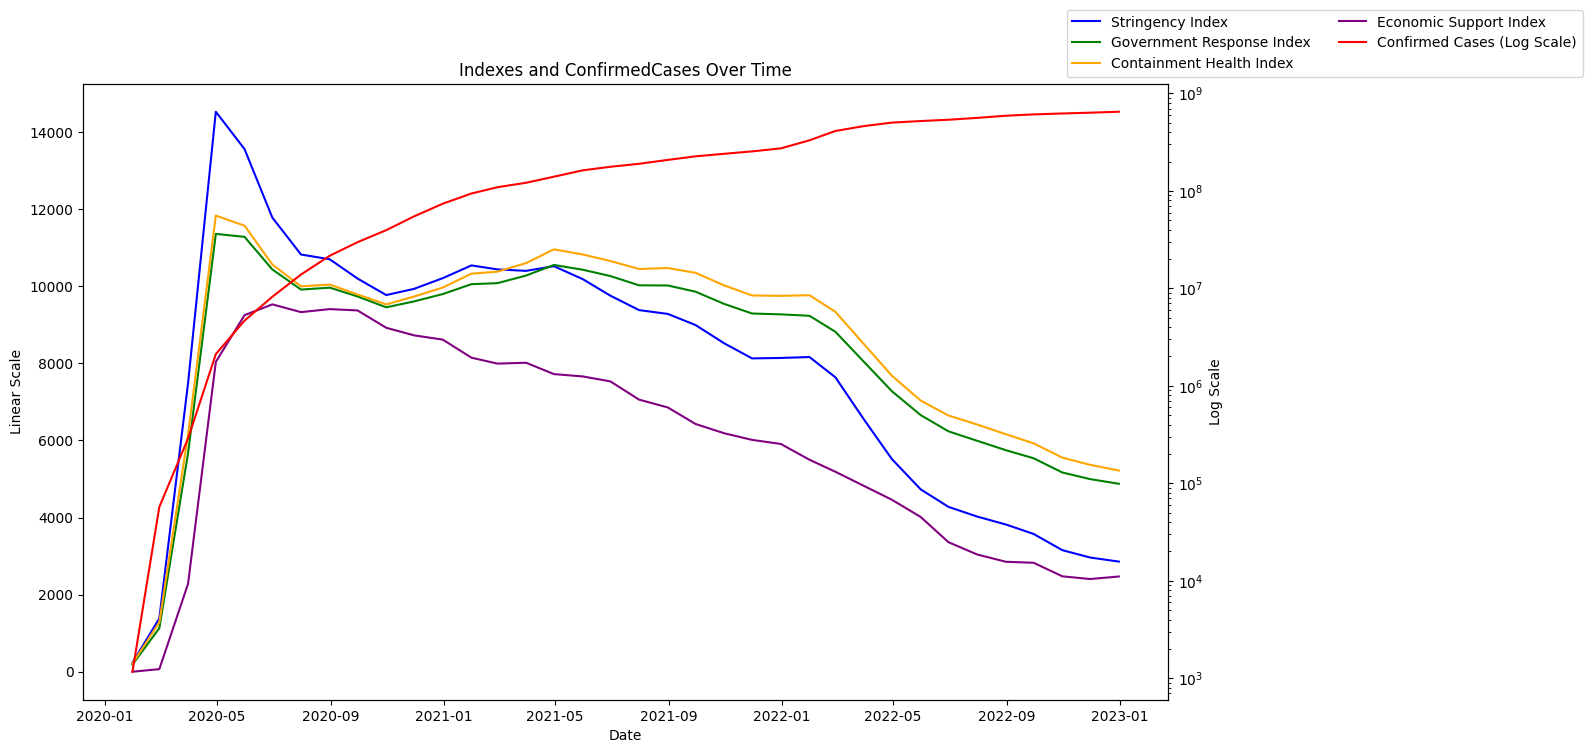

In [89]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

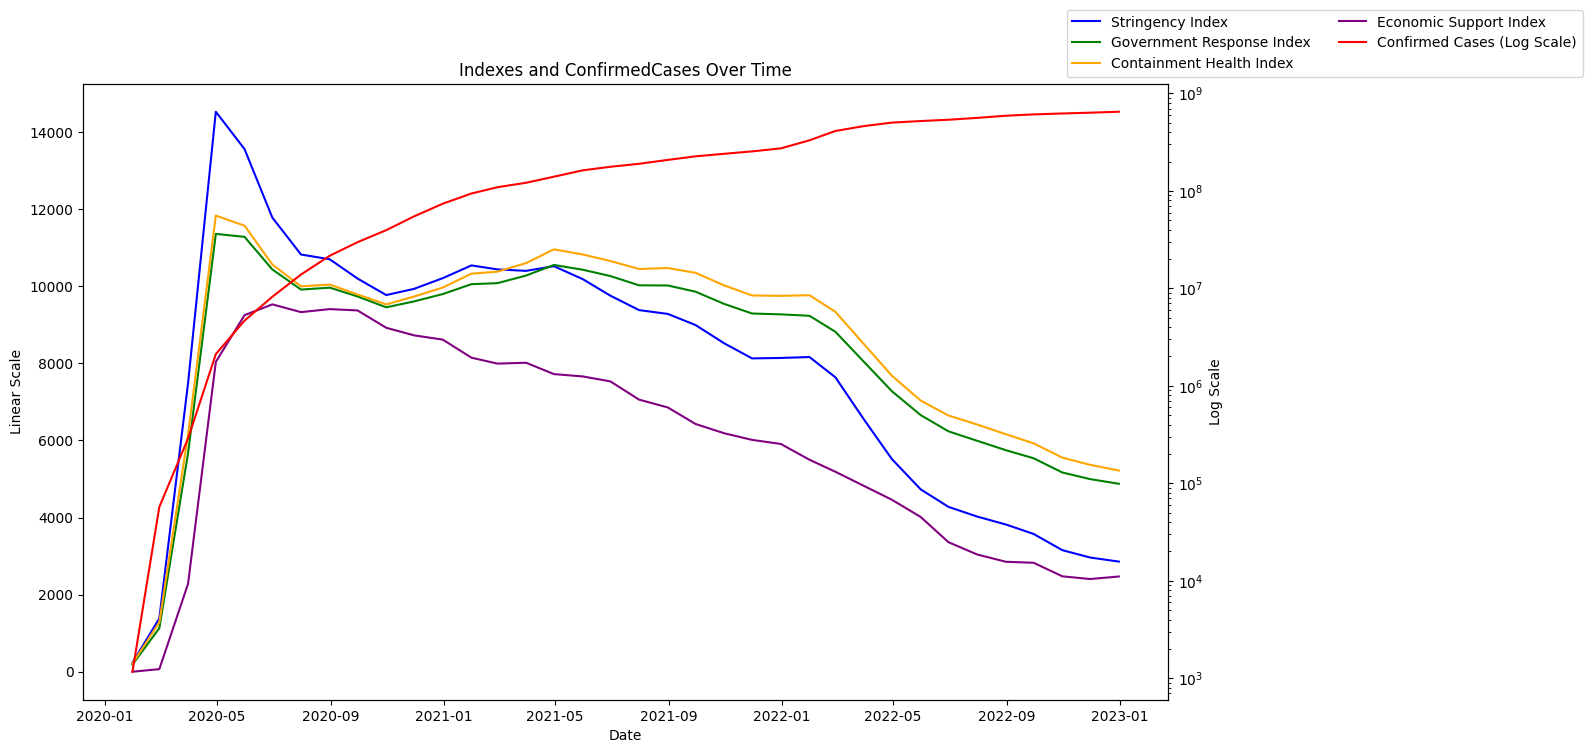

In [90]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

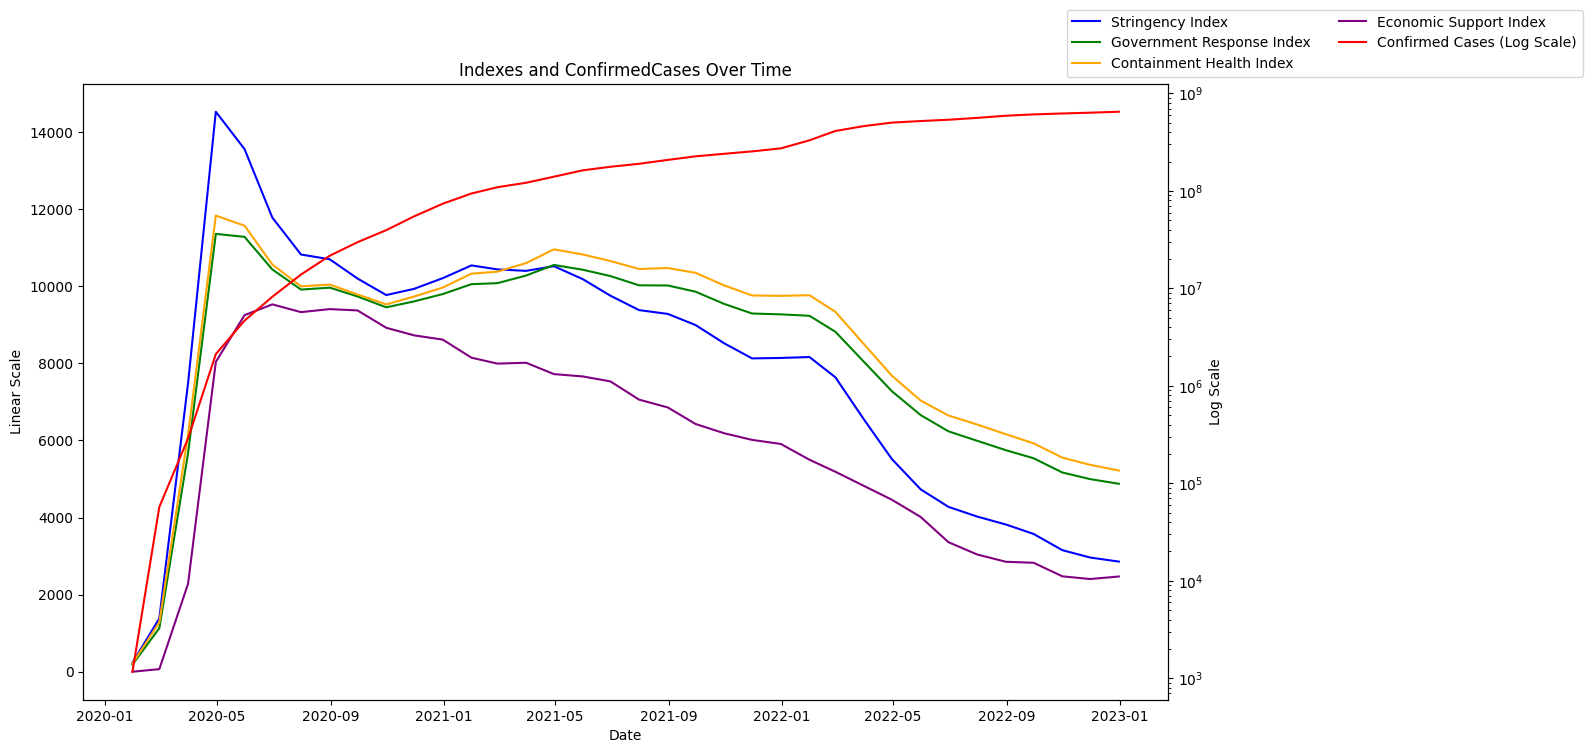

In [91]:
fig, ax1 = plt.subplots(figsize=(14, 8))

colors = ['blue', 'green', 'orange', 'purple', 'red']

sns.lineplot(x='Date', y='StringencyIndex_Average', data=df_monthly, color=colors[0], ax=ax1, label='Stringency Index', legend=None)
sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=df_monthly, color=colors[1], ax=ax1, label='Government Response Index', legend=None)
sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=df_monthly, color=colors[2], ax=ax1, label='Containment Health Index', legend=None)
sns.lineplot(x='Date', y='EconomicSupportIndex', data=df_monthly, color=colors[3], ax=ax1, label='Economic Support Index', legend=None)

ax1.set_title('Indexes and ConfirmedCases Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Linear Scale')

ax2 = ax1.twinx()
sns.lineplot(x='Date', y='ConfirmedCases', data=df_monthly, color=colors[4], ax=ax2, label='Confirmed Cases (Log Scale)', legend=None)
ax2.set_ylabel('Log Scale')
ax2.set_yscale('log')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best', ncol=2, bbox_to_anchor=(0.9, 1))

plt.show()

### EDA 2

In [92]:
aggregation_funcs_for_clustering = {}

for column in df.columns:
    if column == 'CountryCode' or pd.api.types.is_datetime64_dtype(df[column]):
      continue
    elif pd.api.types.is_categorical_dtype(df[column]):
      aggregation_funcs_for_clustering[column] = 'count'
    else:
      aggregation_funcs_for_clustering[column] = 'sum'

/var/folders/hw/nslmzggs3pzbg77w_myl2vcm0000gn/T/ipykernel_34621/1206740885.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[column]):


### Geospatial analysis

/var/folders/hw/nslmzggs3pzbg77w_myl2vcm0000gn/T/ipykernel_34621/1784090017.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


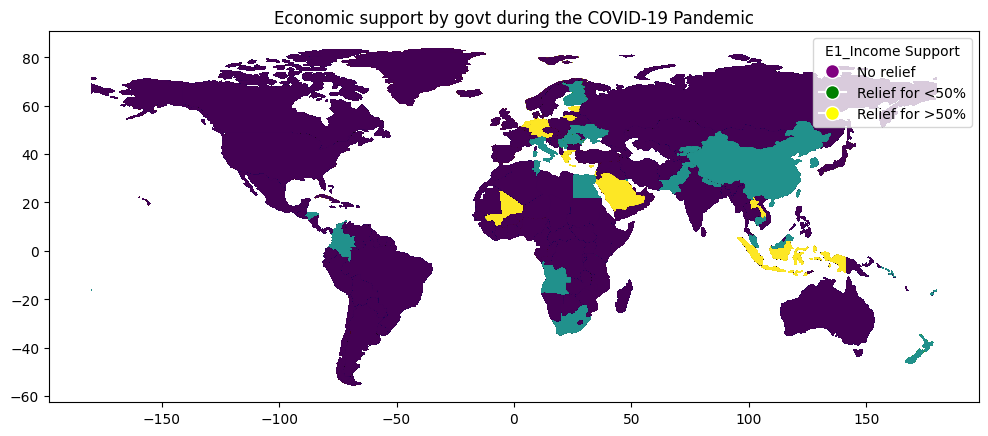

In [137]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# df2 = df.groupby('CountryCode').agg(aggregation_funcs_for_clustering)


# df2['policy_c'] = df2[containment_policy_columns].sum(axis=1)
# df2['policy_e'] = df2[economic_policy_columns].sum(axis=1)
# df2['policy_h'] = df2[health_policy_columns].sum(axis=1)
# df2['policy_v'] = df2[vaccination_policy_columns].sum(axis=1)

# world = world.merge(df2, left_on='iso_a3', right_on='CountryCode')

# policy_dict = {
#     'c': ['policy_c', 'Containment and closure policies'],
#     'e': ['policy_e', 'Economic policies'],
#     'h': ['policy_h', 'Health system policies'],
#     'v': ['policy_v', 'Vaccination policies']
# }

# for key, value in policy_dict.items():
#   fig, ax = plt.subplots(1, 1, figsize=(15, 10))
#   world.plot(column = policy_dict[key][0], cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
#   ax.set_title(f'{policy_dict[key][1]} Implemented Globally')
#   plt.show()

world = world.merge(df, left_on='iso_a3', right_on='CountryCode')


fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='E1_Income support', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No relief', 1: 'Relief for <50%', 2: 'Relief for >50%'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='E1_Income Support')

ax.set_title('Economic support by govt during the COVID-19 Pandemic')
plt.show()


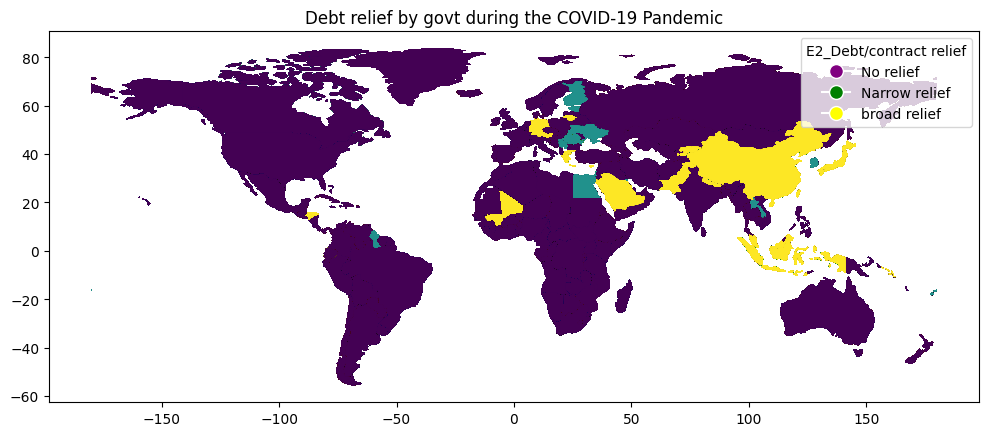

In [138]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='E2_Debt/contract relief', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No relief', 1: 'Narrow relief', 2: 'broad relief'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='E2_Debt/contract relief')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

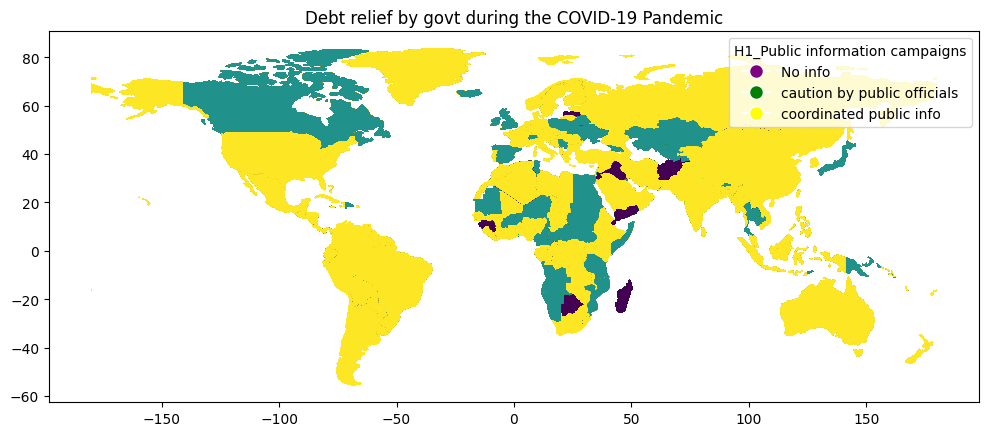

In [136]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H1_Public information campaigns', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No info', 1: 'caution by public officials', 2: 'coordinated public info'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H1_Public information campaigns')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

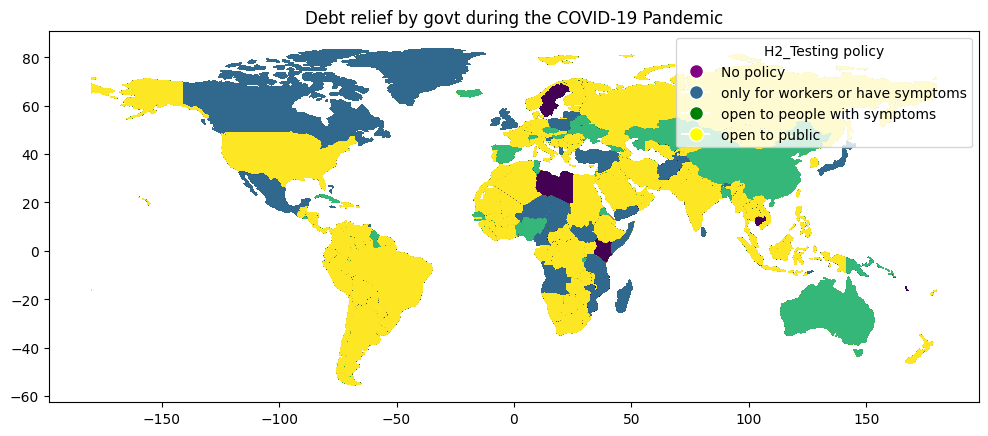

In [134]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H2_Testing policy', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No policy', 1: 'only for workers or have symptoms', 2: 'open to people with symptoms', 3: 'open to public'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#31688e'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H2_Testing policy')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

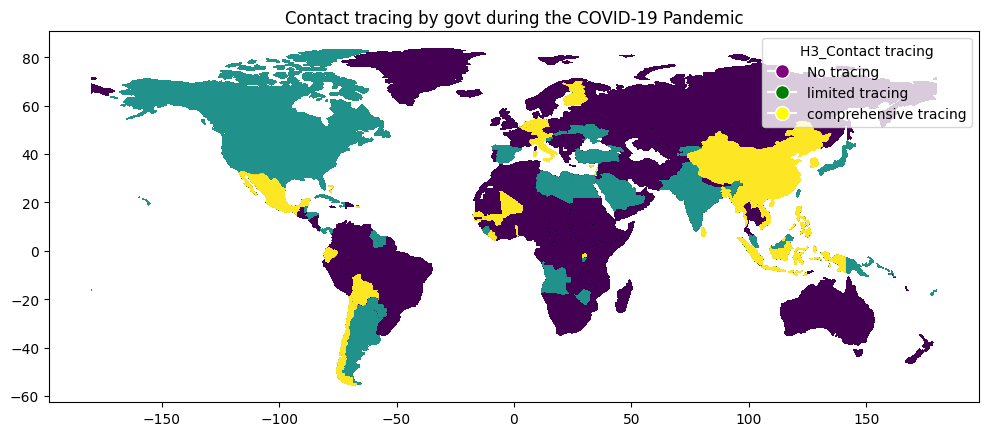

In [139]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H3_Contact tracing', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No tracing', 1: 'limited tracing', 2: 'comprehensive tracing'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow'),]
ax.legend(handles, labels.values(), title='H3_Contact tracing')

ax.set_title('Contact tracing by govt during the COVID-19 Pandemic')
plt.show()

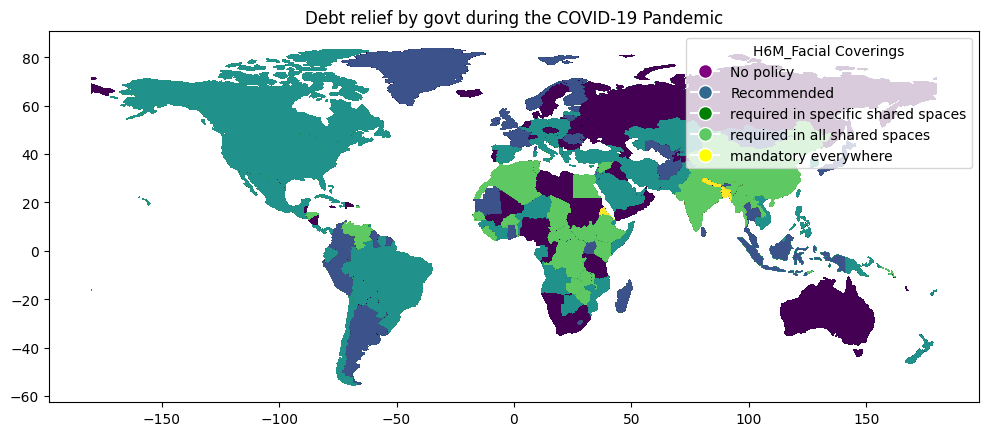

In [141]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H6M_Facial Coverings', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No policy', 1: 'Recommended', 2: 'required in specific shared spaces', 3: 'required in all shared spaces', 4: 'mandatory everywhere'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#31688e'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#5ec962'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H6M_Facial Coverings')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

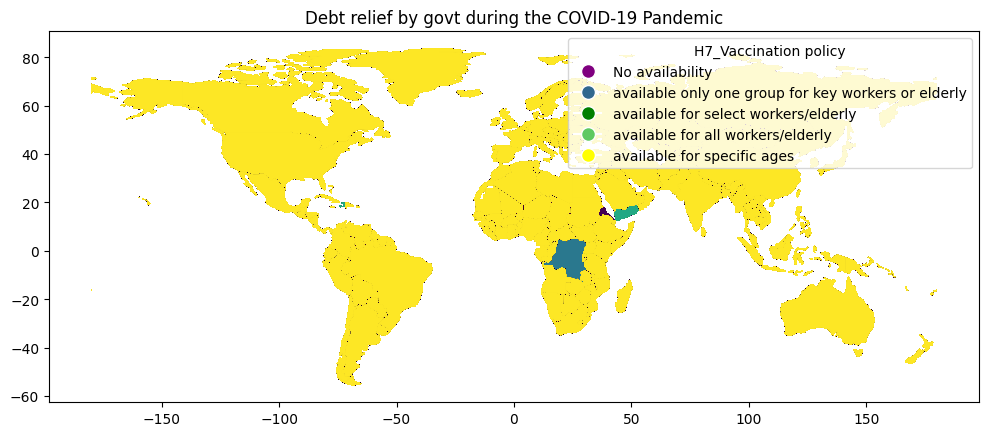

In [142]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H7_Vaccination policy', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No availability', 1: 'available only one group for key workers or elderly', 2: 'available for select workers/elderly', 3: 'available for all workers/elderly', 4: 'available for specific ages', 5: 'universal availability'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#31688e'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#5ec962'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H7_Vaccination policy')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

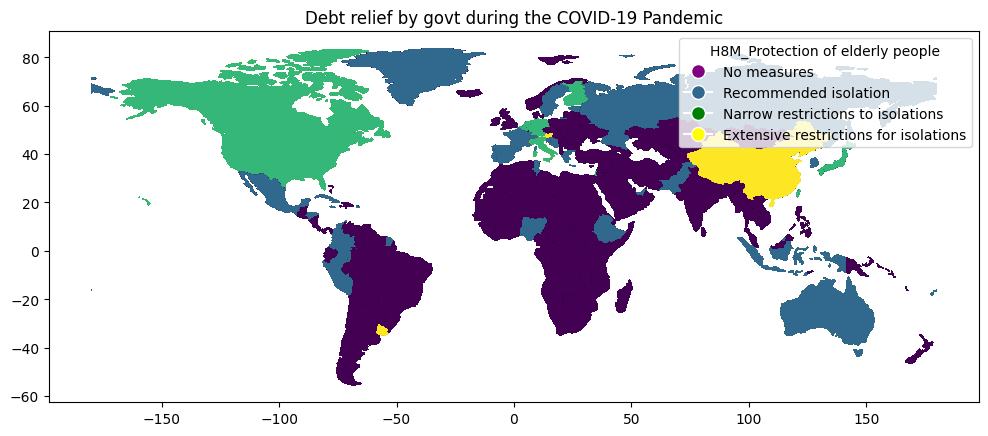

In [144]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(column='H8M_Protection of elderly people', cmap='viridis', legend=False, ax=ax)

labels = {0: 'No measures', 1: 'Recommended isolation', 2: 'Narrow restrictions to isolations', 3: 'Extensive restrictions for isolations'}
handles = [plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='purple'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='#31688e'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='green'),
           plt.Line2D([0], [0], color='w', marker='o', markersize=10, markerfacecolor='yellow')]
ax.legend(handles, labels.values(), title='H8M_Protection of elderly people')

ax.set_title('Debt relief by govt during the COVID-19 Pandemic')
plt.show()

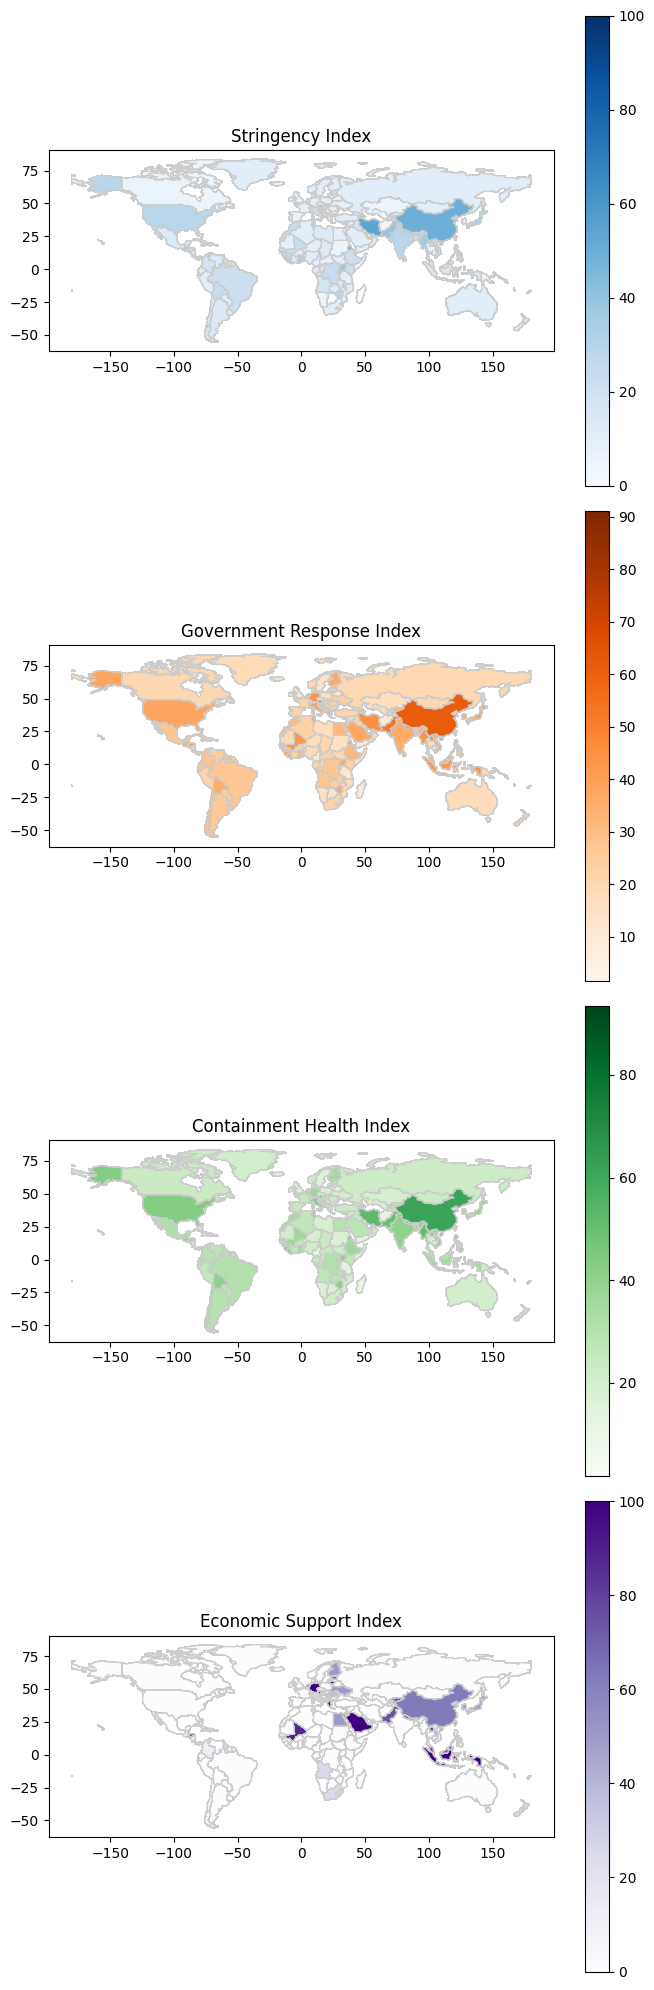

In [118]:
fig, axs = plt.subplots(4, 1, figsize=(7, 20))

world.plot(column='StringencyIndex_Average', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.8', legend=True)
axs[0].set_title('Stringency Index')

world.plot(column='GovernmentResponseIndex_Average', cmap='Oranges', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True)
axs[1].set_title('Government Response Index')

world.plot(column='ContainmentHealthIndex_Average', cmap='Greens', linewidth=0.8, ax=axs[2], edgecolor='0.8', legend=True)
axs[2].set_title('Containment Health Index')

world.plot(column='EconomicSupportIndex', cmap='Purples', linewidth=0.8, ax=axs[3], edgecolor='0.8', legend=True)
axs[3].set_title('Economic Support Index')

plt.tight_layout()
plt.show()


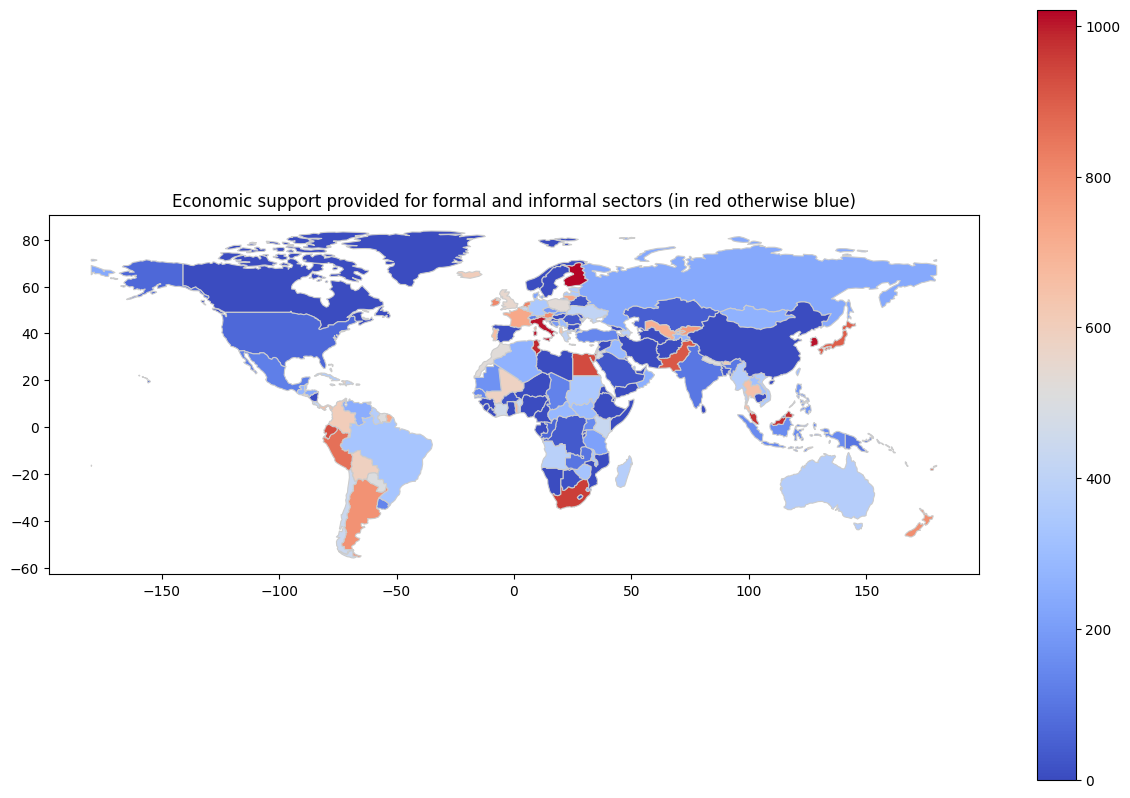

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='E1_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Economic support provided for formal and informal sectors (in red otherwise blue)')
plt.show()

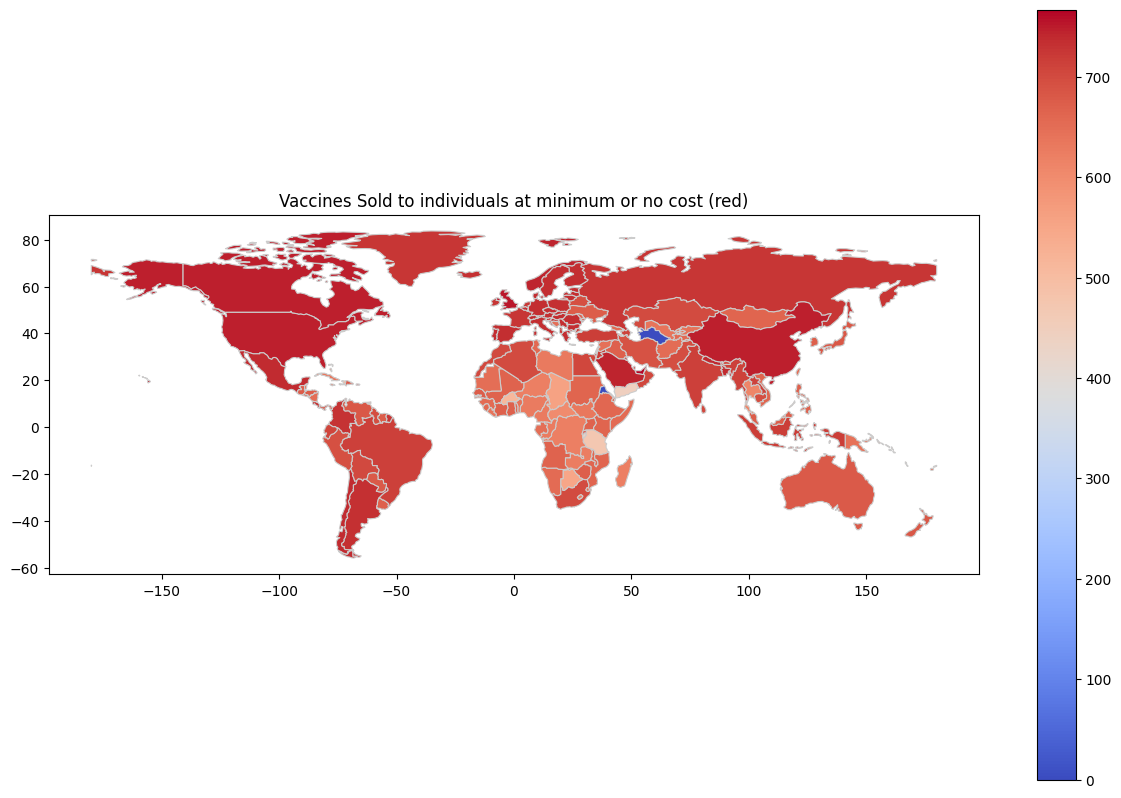

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='H7_Flag', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, aspect='equal')
ax.set_title('Vaccines Sold to individuals at minimum or no cost (red)')
plt.show()